# **1. Introduction**
## **1.1 Background**
Dataset ini berisi informasi pelanggan yang telah bergabung dalam program membership di sebuah supermarket. Data mencakup berbagai aspek demografis seperti tahun kelahiran, tingkat pendidikan, status pernikahan, dan pendapatan, serta informasi terkait perilaku belanja, termasuk jumlah pembelian di berbagai kategori produk (anggur, daging, ikan, permen, emas), jumlah transaksi melalui berbagai saluran (web, katalog, toko fisik), dan partisipasi dalam kampanye pemasaran. Selain itu, dataset ini juga mencatat seberapa baru pelanggan melakukan pembelian (recency) serta apakah mereka menerima kampanye promosi tertentu.

## **1.2 Pernyataan Masalah**
Dalam industri ritel, mempertahankan pelanggan yang aktif berbelanja merupakan tantangan utama untuk meningkatkan loyalitas dan mencegah perpindahan ke kompetitor. Salah satu indikator penting dalam menilai keterlibatan pelanggan adalah Recency, yaitu jumlah hari sejak terakhir kali pelanggan melakukan pembelian. Pelanggan yang memiliki Recency lebih dari 90 hari menunjukkan risiko tinggi untuk menjadi tidak aktif dan beralih ke supermarket lain.

Dalam dataset ini, list customer-customer yang berada dalam dataset ini adalah customer yang sudah mendaftarkan membership. Artinya mereka bukan cuma sekedar ingin belanja di supermarket, tetapi mereka juga ingin mendapatkan benefit dari program membership, dan menjadi bagian dari supermarket. Akan tetapi, jika customer yang sudah tidak berbelanja di supermarket kami selama 90 hari, artinya mungkin mereka tidak mendapatkan benefit ketika menjadi membership dan mendaftarkan membership. Jika sudah sampai seperti itu, maka customer tersebut mungkin akan melirik ke supermarket lain dengan tawaran membership yang lebih banyak benefitnya.

## **1.3 Tujuan Analisis**
Untuk mengetahui faktor apa saja yang menyebabkan pelanggan tidak berbelanja selama lebih dari 90 hari, dan bagaimana supermarket dapat merancang strategi bisnis untuk mengembalikan pelanggan tersebut.

# **2. Data Preparation**

In [68]:
# import library
import numpy as np
import pandas as pd 

# import visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# menampilkan semua kolom
pd.set_option('display.max_columns', None)

# menghilangkan warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

# import datelibrary
from datetime import datetime
from operator import attrgetter

from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

## **2.1 Data Understanding**

Dataset supermarket_customer ini merepresentasikan data pelanggan  yang join membership dalam sebuah supermarket. Setiap kolom-kolom dalam dataset ini berisi informasi tentang atribut pelanggan, pembelian, serta response pelanggan terhadap kampanye pemasaran.

Berikut adalah penjelasan masing-masing kolom pada dataset supermarket_customers.csv

**Pelanggan:**
- **ID:** Kolom ID untuk setiap pelanggan (Categorical, Unique).
- **Year_Birth:** Tahun lahir pelanggan (Categorical).
- **Education:** Tingkat pendidikan terakhir pelanggan (Categorical).
- **Marital_Status:** Apakah pelanggan tersebut sudah menikah atau belum (Categorical).
- **Income:** Pendapatan rumah tangga tahunan pelanggan.
- **Kidhome:** Jumlah anak dalam rumah tangga pelanggan (umur 6 - 12 tahun)
- **Teenhome:** Jumlah remaja dalam rumah tangga pelanggan (umur 13 - 20 tahun)

**Informasi Waktu dan Loyalitas:**
- **Dt_Customer:** Tanggal pelanggan mendaftar member di supermarket ini
- **Recency:** Jumlah hari sejak terakhir kali pelanggan melakukan pembelian

**Pengeluaran Pelanggan ($):**
- **MntWines:** Total pengeluaran untuk produk wine (anggur) dalam 2 tahun terakhir
- **MntFruits:** Total pengeluaran untuk produk buah dalam 2 tahun terakhir
- **MntMeatProducts:** Total pengeluaran untuk produk daging dalam 2 tahun terakhir
- **MntFishProducts:** Total pengeluaran untuk produk ikan dalam 2 tahun terakhir
- **MntSweetProducts:** Total pengeluaran untuk produk makanan manis dalam 2 tahun terakhir
- **MntGoldProds:** Total pengeluaran untuk produk (barang berharga) dalam 2 tahun terakhir

**Aktivitas Pembelian Pelanggan:** 
- **NumDealsPurchases:** Jumlah pembelian yang dilakukan dalam diskon
- **NumWebPurchases:** Jumlah pembelian yang dilakukan melalui website
- **NumCatalogPurchases:** Jumlah pembelian yang dilakukan melalui katalog
- **NumStorePurchases:** Jumlah pembelian yang dilakukan dengan langsung datang ke toko fisik
- **NumWebVisitsMonth:** Jumlah kunjungan pelanggan ke website dalam sebulan terakhir

**Respon Terhadap Kampanye Pemasaran:** 
- **AcceptedCmp1 - AcceptedCmp5:** Indikator (0/1) apakah pelanggan menerima dan merespon kampanye pemasaran tertentu.
- **Response:** Indikator apakah pelanggan merespon kampanye pemasaran terakhir.
- **Complain:** Indikator apakah pelanggan mengajukkan keluhan dalam 2 tahun terakhir.

**Informasi Tambahan:** 
- **Z_CostContact:** Biaya yang dikeluarkan per kontak (nilai tetap).
- **Z_Revenue:** Pendapatan yang dihasilkan dari setiap pelanggan (nilai tetap).

In [69]:
df = pd.read_csv('supermarket_customers.csv', delimiter='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [70]:
# Mengecek jumlah baris dan kolom pada dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

# Mengecek tipe data yang dipakai dari setiap kolom
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [71]:
# Mengecek tipe data unique dari kolom yang bertipe data object
display(df.describe(), df.describe(include='object'))

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [72]:
pd.set_option('display.max_colwidth', 10000)

# data unit di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                    ID              2240   
1            Year_Birth                59   
2             Education                 5   
3        Marital_Status                 8   
4                Income              1974   
5               Kidhome                 3   
6              Teenhome                 3   
7           Dt_Customer               663   
8               Recency               100   
9              MntWines               776   
10            MntFruits               158   
11      MntMeatProducts               558   
12      MntFishProducts               182   
13     MntSweetProducts               177   
14         MntGoldProds               213   
15    NumDealsPurchases                15   
16      NumWebPurchases                15   
17  NumCatalogPurchases                14   
18    NumStorePurchases                14   
19    NumWebVisitsMonth                16   
20         AcceptedCmp3                 2   
21         AcceptedCmp4                 2   
22         AcceptedCmp5                 2   
23         AcceptedCmp1                 2   
24         AcceptedCmp2                 2   
25             Complain                 2   
26        Z_CostContact                 1   
27            Z_Revenue                 1   
28             Response                 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]  
1                                                                                                                                                                                                                                            

**Dari pengecekan data diatas, bisa disimpulkan bahwa:** 
- Dataset supermarket_customers memiliki 29 kolom dan 2240 baris.
- Kolom `Income` memiliki data kosong sekitar 1.07%. Data kosong diwakili dengan data NaN.
- Kolom `ID` berisikan id unik untuk setiap customer. Karena tidak ada kolom nama di dataset ini, maka kolom `ID` bisa dijadikan categorical nominal dan diubah ke tipe data object.
- Kolom `Marital_Status` masih anomali datanya, sehingga perlu di cleaning.
- Kolom Z_CostContact dan Z_Revenue dalam dataset ini bersifat administratif atau teknis.daripada relevan dengan analisis perilaku pelanggan dan loyalitas. Dan kolom ini bernilai tetap (konstan), sehingga dihapus saja.
- Karena tidak ada kolom age, nanti akan dibuat kolom `Age` dari kolom `Year_Birth` untuk melakukan categorical umur.

## **2.2 Data Cleaning**

In [73]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

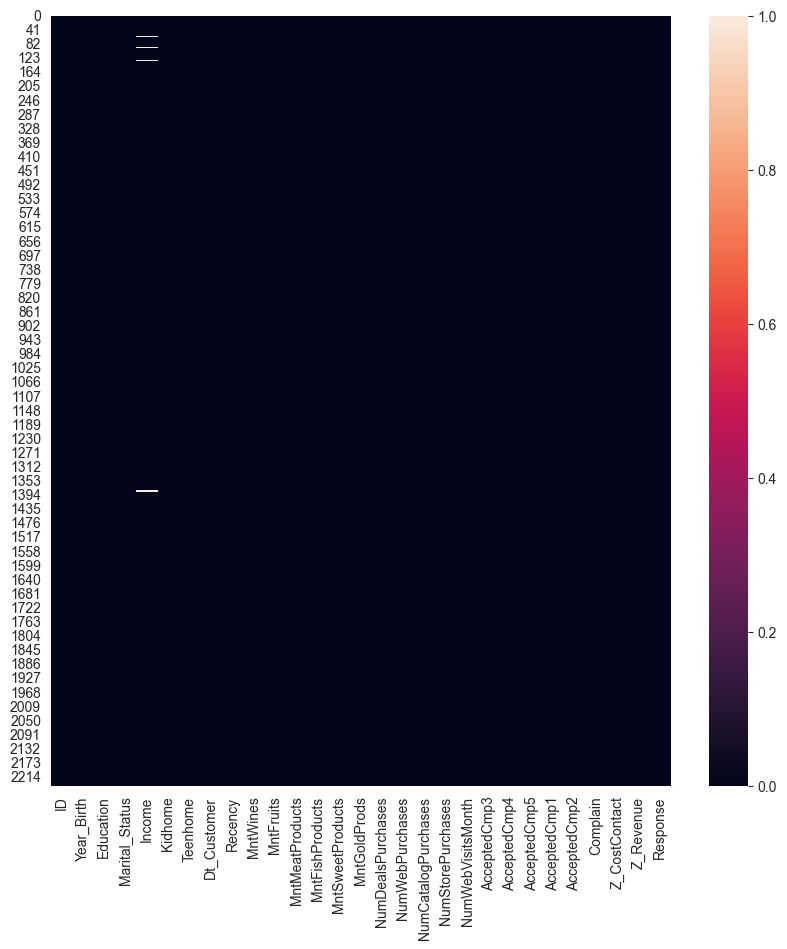

In [74]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[df.columns].isna())

- Missing value di kolom `Income` memiliki proporsi yang sangat rendah, yaitu 1.07%
- Cara untuk menangani missing value ialah bisa dihapus saja. Karena jumlah datanya yang sedikit dan tidak berpengaruh signifikan.

In [75]:
df.dropna(inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<Axes: >

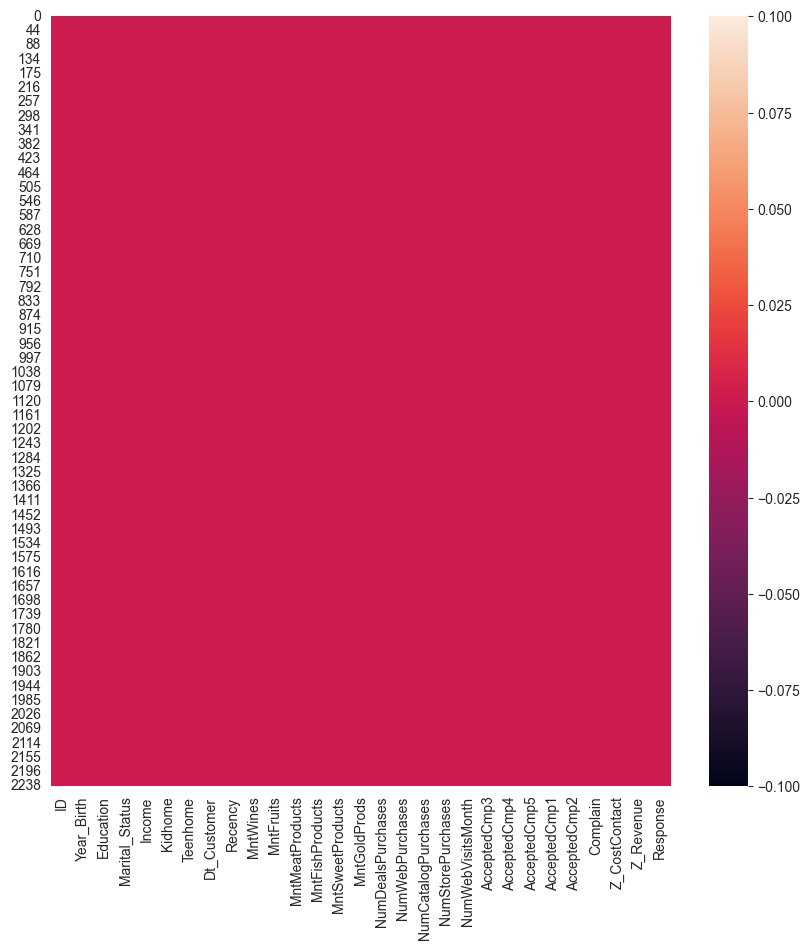

In [76]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[df.columns].isna())

### Mengganti tipe data dari **int** ke **object** pada kolom `ID`

In [77]:
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

### Cek Outliers pada Kolom Numerical

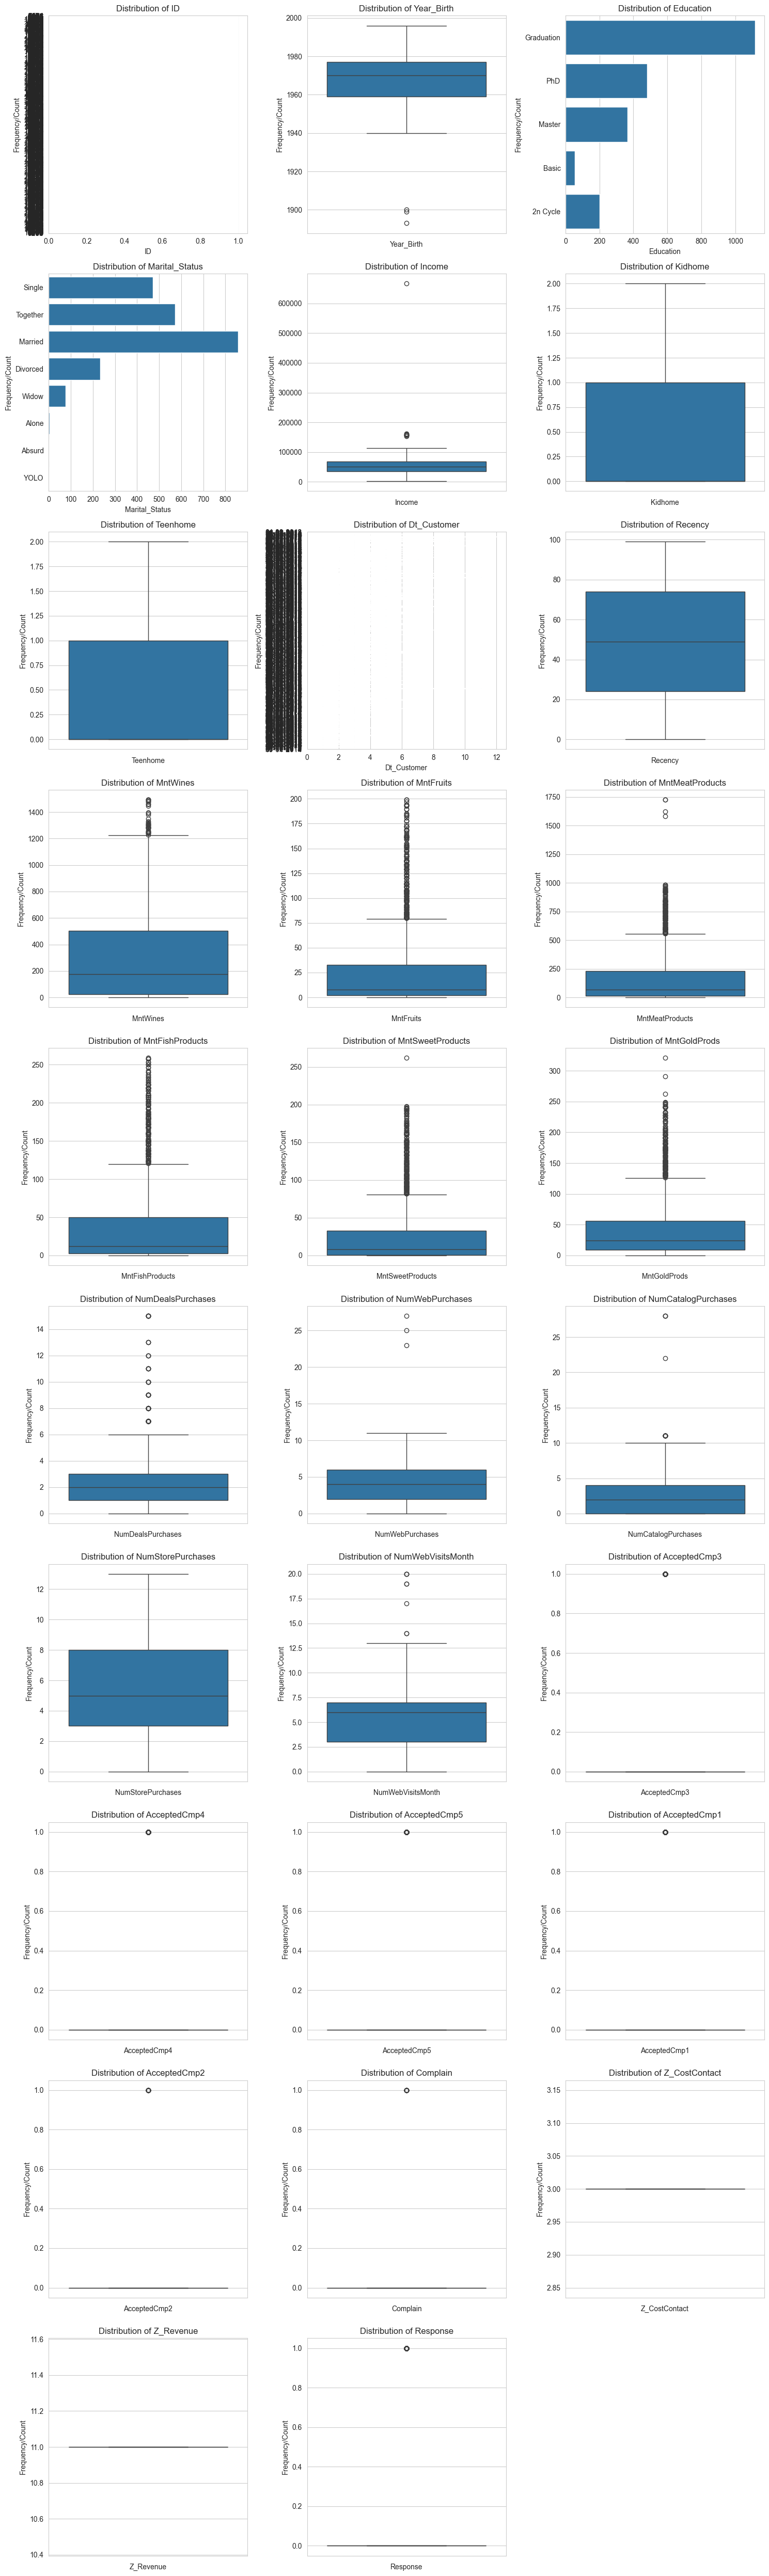

In [78]:
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(df[col])
    else:
        sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency/Count')

plt.tight_layout()
plt.show()

### Check Outliers pada kolom `Year_Birth`

<Axes: xlabel='Year_Birth', ylabel='Count'>

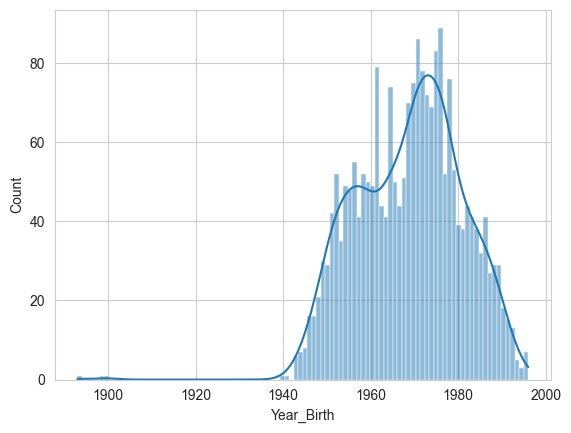

In [79]:
sns.histplot(data=df, x='Year_Birth', kde=True, bins = 100)

Dari kolom `Year_Birth` diatas, bisa disimpulkan bahwa: 
- Bentuk dari histogram nya merupakan Left Skewed, artinya data terdistribusi tidak normal
- Terdapat 3 customer dengan tahun kelahiran yang tidak masuk akal, dengan tahun 1900 kebawah. Dibilang tidak masuk akal karena mustahil customer tersebut masih hidup dan bisa berbelanja dengan normal di usia > 100 tahun.
- Solusinya ialah dengan menghapus datanya

In [80]:
# Menghitung Q1, Q3, dan IQR
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['Year_Birth'] < lower_bound) | (df['Year_Birth'] > upper_bound)]

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")
print(f"Jumlah outlier: {len(outliers)}")

Batas bawah: 1932.0, Batas atas: 2004.0
Jumlah outlier: 3


In [81]:
df[df['Year_Birth'] < lower_bound]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  26-09-2013       99        15          6                8   
239  17-05-2014       23         8          0                5   
339  26-09-2013       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
192             0             0         1              3         11         0  
239             0             0         0              3         11         0  
339             0             0         0              3         11         0

In [82]:
# Menghapus outliers pada kolom Year_Birth
df.drop(df[df['Year_Birth'] < lower_bound].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2208  10870        1967  Graduation        Married  61223.0        0   
2209   4001        1946         PhD       Together  64014.0        2   
2210   7270        1981  Graduation       Divorced  56981.0        0   
2211   8235        1956      Master       Together  69245.0        0   
2212   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2208         1  13-06-2013       46       709         43              182   
2209         1  10-06-2014       56       406          0               30   
2210         0  25-01-2014       91       908         48              217   
2211         1  24-01-2014        8       428         30              214   
2212         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2208               42               118           247                  2   
2209                0                 0             8                  7   
2210               32                12            24                  1   
2211               80                30            61                  2   
2212                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2208                9                    3                  4   
2209                8                    2                  5   
2210                2                    3                 13   
2211                6                    5                 10   
2212                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2208                  5             0     

<Axes: xlabel='Year_Birth', ylabel='Count'>

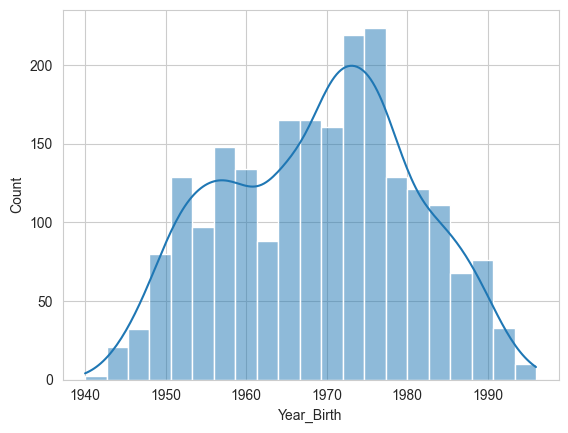

In [83]:
sns.histplot(data=df, x='Year_Birth', kde=True)

### Cleaning pada kolom `Education`

In [84]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [85]:
df['Education'].replace({
    'PhD': 'Doctorate',
    '2n Cycle': 'Master',
    'Basic': 'High School'
}, inplace=True)

df['Education'].unique()

array(['Graduation', 'Doctorate', 'Master', 'High School'], dtype=object)

Mengubah data pada kolom `Income`:
- Graduation -> Graduation
- PhD -> Doctore
- Master -> Master
- Basic -> High School
- 2n Cycle -> Master

Penggantian bertujuan untuk memudahkan analisis, menghindari ambiguitas, dan menyederhanakan interpretasi

### Cleaning pada kolom `Marital_Status`

In [86]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [87]:
print(df['Marital_Status'].value_counts())

Marital_Status
Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [88]:
# Cek persentase customer yang Marital_Status = ALone/Absurd/YOLO
(len(df[df['Marital_Status'] == 'Alone']) + len(df[df['Marital_Status'] == 'Absurd']) + len(df[df['Marital_Status'] == 'YOLO'])) / len(df) * 100

0.3163126976954361

In [89]:
df['Marital_Status'].replace({
    'Alone': 'Others',
    'Absurd': 'Others',
    'YOLO': 'Others',
}, inplace=True)

In [90]:
df[df['Marital_Status'] == 'Others']

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
121     433        1958      Master         Others  61331.0        1   
127    7660        1973   Doctorate         Others  35860.0        1   
142      92        1988  Graduation         Others  34176.0        1   
2067   7734        1993  Graduation         Others  79244.0        0   
2108   4369        1957      Master         Others  65487.0        0   
2151    492        1973   Doctorate         Others  48432.0        0   
2176  11133        1973   Doctorate         Others  48432.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
121          1  10-03-2013       42       534          5               47   
127          1  19-05-2014       37        15          0                8   
142          0  12-05-2014       12         5          7               24   
2067         0  19-12-2012       58       471        102              125   
2108         0  10-01-2014       48       240         67              500   
2151         1  18-10-2012        3       322          3               50   
2176         1  18-10-2012        3       322          3               50   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
121                 0                 5            41                  5   
127                 4                 2            20                  2   
142                19                14            20                  4   
2067              212                61           245                  1   
2108              199                 0           163                  3   
2151                4                 3            42                  5   
2176                4                 3            42                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
121                11                    1                  6   
127                 1                    1                  2   
142                 3                    0                  4   
2067                4                   10                  7   
2108                3                    5                  6   
2151                7                    1                  6   
2176                7                    1                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
121                   8             0             0             0   
127                   5             1             0             0   
142                   6             0             0             0   
2067                  1             0             0             1   
2108                  2             0             0             0   
2151                  8             0             0             0   
2176                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
121              0             0         0              3         11         0  
127              0             0         0              3         11         1  
142              0             0         0              3         11         0  
2067             1             0         0              3         11         1  
2108             0             0         0              3         11         0  
2151             0             0         0              3         11         0  
2176             0             0         0              3         11         1

Cleaning pada kolom `Marital_Status` dengan cara: 
- Mengganti customer dengan `Marital_Status` Alone / Absurd / YOLO -> Others
- Karena walaupun status pernikahannya anomali, tetapi gaji mereka bukanlah outliers, dan total pengeluaran mereka untuk produk cukup tinggi. Sehingga masih bisa dianalisis.

### Cek outlier pada kolom `Income`

In [91]:
print(df['Income'].describe())

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


<Axes: xlabel='Income'>

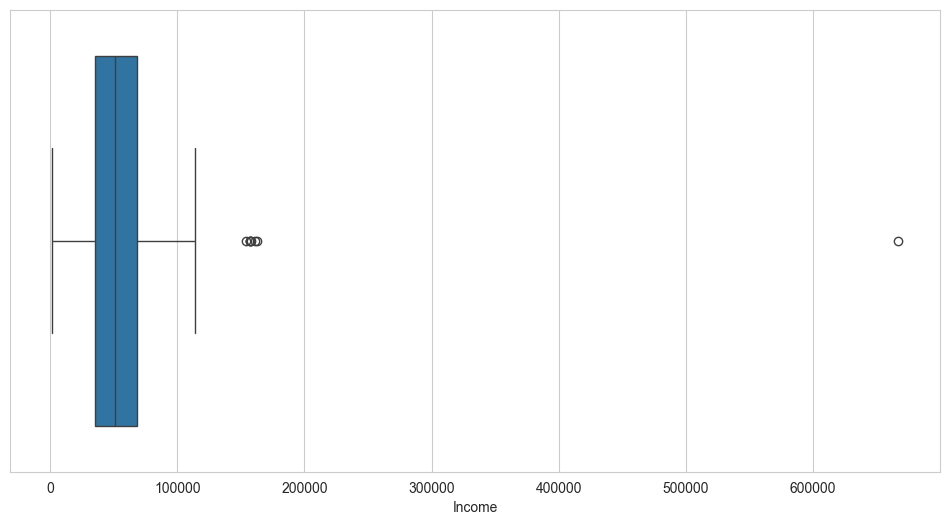

In [92]:
# Memeriksa pendapatan apakah pendapatan tersebut bernilai negatif
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Income')

<Axes: xlabel='Income', ylabel='Count'>

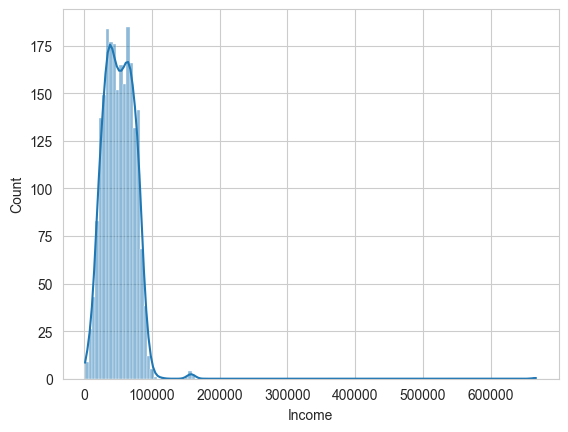

In [93]:
sns.histplot(data=df, x='Income', kde=True)

In [94]:
# Menghitung Q1, Q3, dan IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")
print(f"Jumlah outlier: {len(outliers)}")

Batas bawah: -14615.5, Batas atas: 118348.5
Jumlah outlier: 8


In [95]:
# Menghitung persentase data pada kolom Income yang merupakan data outliers
len(outliers) / df.shape[0] * 100

0.36150022593764125

In [96]:
outliers

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
153    8475        1973   Doctorate        Married  157243.0        0   
601    1503        1976   Doctorate       Together  162397.0        1   
639    5555        1975  Graduation       Divorced  153924.0        0   
671    1501        1982   Doctorate        Married  160803.0        0   
1284   5336        1971      Master       Together  157733.0        1   
1633   4931        1977  Graduation       Together  157146.0        0   
2106  11181        1949   Doctorate        Married  156924.0        0   
2206   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
153          1  01-03-2014       98        20          2             1582   
601          1  03-06-2013       31        85          1               16   
639          0  07-02-2014       81         1          1                1   
671          0  04-08-2012       21        55         16             1622   
1284         0  04-06-2013       37        39          1                9   
1633         0  29-04-2013       13         1          0             1725   
2106         0  29-08-2013       85         2          1                2   
2206         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
153                 1                 2             1                 15   
601                 2                 1             2                  0   
639                 1                 1             1                  0   
671                17                 3             4                 15   
1284                2                 0             8                  0   
1633                2                 1             1                  0   
2106                1                 1             1                  0   
2206                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
153                 0                   22                  0   
601                 0                    0                  1   
639                 0                    0                  0   
671                 0                   28                  1   
1284                1                    0                  1   
1633                0                   28                  0   
2106                0                    0                  0   
2206                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
153                   0             0             0             0   
601                   1             0             0             0   
639                   0             0             0             0   
671                   0             0             0             0   
1284                  1             0             0             0   
1633                  1             0             0             0   
2106                  0             0             0             0   
2206                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
153              0             0         0              3         11         0  
601              0             0         0              3         11         0  
639              0             0         0              3         11         0  
671              0             0         0              3         11         0  
1284             0             0         0              3         11         0  
1633             0             0         0              3         11         0  
2106             0             0         0              3         11         0  
2206             0             0         0              3         11         0

In [97]:
# Mencari rata-rata gaji customer di setiap education
# dan mengurutkan rata-rata gaji dari tinggi ke rendah berdasarkan education
df.pivot_table(values = 'Income', index = 'Education', aggfunc = np.mean).sort_values(by = 'Income', ascending = False)

Income
Education                
Doctorate    56088.258333
Graduation   52720.373656
Master       51056.333925
High School  20306.259259

Terdapat 1 customer yang pendapatan rumah tangganya $666666 per tahun. Ini termasuk outlier. Tetapi mungkin karena customer tersebut merupakan orang kaya atau dari keluarga kaya, customer ini tidak perlu  dihapus.

### Menambahkan kolom `Have_Child` kedalam dataset
- Kolom ini berfungsi sebagai indikator apakah customer tersebut mempunyai anak atau tidak.
- Jika customer tersebut memiliki Kidhome > 0 / Teenhome > 0 / Kidhome & Teenhome > 0, maka status nya adalah Yes, Selain itu No

In [98]:
df.insert(7, 'Have_Child', np.where(
    (df['Kidhome'] > 0) | (df['Teenhome'] > 0) | (df['Kidhome'] & df['Teenhome'] > 0),
    'Yes',
    'No' 
))
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981   Doctorate        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2208  10870        1967  Graduation        Married  61223.0        0   
2209   4001        1946   Doctorate       Together  64014.0        2   
2210   7270        1981  Graduation       Divorced  56981.0        0   
2211   8235        1956      Master       Together  69245.0        0   
2212   9405        1954   Doctorate        Married  52869.0        1   

      Teenhome Have_Child Dt_Customer  Recency  MntWines  MntFruits  \
0            0         No  04-09-2012       58       635         88   
1            1        Yes  08-03-2014       38        11          1   
2            0         No  21-08-2013       26       426         49   
3            0        Yes  10-02-2014       26        11          4   
4            0        Yes  19-01-2014       94       173         43   
...        ...        ...         ...      ...       ...        ...   
2208         1        Yes  13-06-2013       46       709         43   
2209         1        Yes  10-06-2014       56       406          0   
2210         0         No  25-01-2014       91       908         48   
2211         1        Yes  24-01-2014        8       428         30   
2212         1        Yes  15-10-2012       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2208              182               42               118           247   
2209               30                0                 0             8   
2210              217               32                12            24   
2211              214               80                30            61   
2212               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2208                  2                9                    3   
2209                  7                8                    2   
2210                  1                2                    3   
2211                  2                6                    5   
2212                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2208                  4                  5             0             0   
2209                  5      

### Mengkonversi kolom `Dt_Customer` dari object ke date

In [99]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   object        
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Have_Child           2213 non-null   object        
 8   Dt_Customer          2213 non-null   datetime64[ns]
 9   Recency              2213 non-null   int64         
 10  MntWines             2213 non-null   int64         
 11  MntFruits            2213 non-null   int64         
 12  MntMeatProducts      2213 non-null   int64         
 13  MntFishProducts      2213 non-nul

### Mengurutkan urutan kolom `AcceptedCmp1 - 5`
- Agar lebih mudah dibaca, saya akan mengurutkan kolom `AcceptedCmp1 - 5`

In [100]:
# Nama kolom yang ingin dipindahkan
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Pisahkan kolom lain selain AcceptedCmp1-5
other_cols = [col for col in df.columns if col not in accepted_cols]

# Temukan posisi kolom TotalAcceptedCmp
complain_idx = other_cols.index('Complain')

# Susun ulang dengan AcceptedCmp1-5 tepat sebelum TotalAcceptedCmp
new_order = (
    other_cols[:complain_idx] + accepted_cols + other_cols[complain_idx:]
)

# Atur ulang DataFrame dengan urutan baru
df = df[new_order]

In [101]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981   Doctorate        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2208  10870        1967  Graduation        Married  61223.0        0   
2209   4001        1946   Doctorate       Together  64014.0        2   
2210   7270        1981  Graduation       Divorced  56981.0        0   
2211   8235        1956      Master       Together  69245.0        0   
2212   9405        1954   Doctorate        Married  52869.0        1   

      Teenhome Have_Child Dt_Customer  Recency  MntWines  MntFruits  \
0            0         No  2012-09-04       58       635         88   
1            1        Yes  2014-03-08       38        11          1   
2            0         No  2013-08-21       26       426         49   
3            0        Yes  2014-02-10       26        11          4   
4            0        Yes  2014-01-19       94       173         43   
...        ...        ...         ...      ...       ...        ...   
2208         1        Yes  2013-06-13       46       709         43   
2209         1        Yes  2014-06-10       56       406          0   
2210         0         No  2014-01-25       91       908         48   
2211         1        Yes  2014-01-24        8       428         30   
2212         1        Yes  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2208              182               42               118           247   
2209               30                0                 0             8   
2210              217               32                12            24   
2211              214               80                30            61   
2212               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2208                  2                9                    3   
2209                  7                8                    2   
2210                  1                2                    3   
2211                  2                6                    5   
2212                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2208                  4                  5             0             0   
2209                  5      

### Menghapus Kolom `Z_CostContact` dan `Z_Revenue`
- Kolom tersebut tidak berguna pada saat analisis karena valuenya hanya 11. Untuk itu di drop saja

In [102]:
df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

### Mengganti nama kolom `Response` menjadi `AcceptedLastCmp` dan memindahkannya setelah kolom `AcceptedCmp5`
- kolom `Response` berisikan indikator apakah pelanggan merespon kampanye pemasaran terakhir.
- Agar mudah dibaca, nama kolomnya harus diubah menjadi `AcceptedLastCmp`

In [103]:
df.rename(columns={'Response': 'AcceptedLastCmp'}, inplace=True)

# Nama kolom yang ingin dipindahkan
accepted_cols = ['AcceptedLastCmp']

# Pisahkan kolom lain selain AcceptedCmp1-5
other_cols = [col for col in df.columns if col not in accepted_cols]

# Temukan posisi kolom TotalAcceptedCmp
complain_idx = other_cols.index('Complain')

# Susun ulang dengan AcceptedCmp1-5 tepat sebelum TotalAcceptedCmp
new_order = (
    other_cols[:complain_idx] + accepted_cols + other_cols[complain_idx:]
)

# Atur ulang DataFrame dengan urutan baru
df = df[new_order]
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981   Doctorate        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2208  10870        1967  Graduation        Married  61223.0        0   
2209   4001        1946   Doctorate       Together  64014.0        2   
2210   7270        1981  Graduation       Divorced  56981.0        0   
2211   8235        1956      Master       Together  69245.0        0   
2212   9405        1954   Doctorate        Married  52869.0        1   

      Teenhome Have_Child Dt_Customer  Recency  MntWines  MntFruits  \
0            0         No  2012-09-04       58       635         88   
1            1        Yes  2014-03-08       38        11          1   
2            0         No  2013-08-21       26       426         49   
3            0        Yes  2014-02-10       26        11          4   
4            0        Yes  2014-01-19       94       173         43   
...        ...        ...         ...      ...       ...        ...   
2208         1        Yes  2013-06-13       46       709         43   
2209         1        Yes  2014-06-10       56       406          0   
2210         0         No  2014-01-25       91       908         48   
2211         1        Yes  2014-01-24        8       428         30   
2212         1        Yes  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2208              182               42               118           247   
2209               30                0                 0             8   
2210              217               32                12            24   
2211              214               80                30            61   
2212               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2208                  2                9                    3   
2209                  7                8                    2   
2210                  1                2                    3   
2211                  2                6                    5   
2212                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2208                  4                  5             0             0   
2209                  5      

### Menambahkan kolom
- Tujuan menambahkan kolom ini agar mempermudah iterpretasi kolom-kolom jika mau di analisis
- Kolom yang akan ditambahkan: 
    - `Generation`: Dari tahun kelahiran. Karena saya tidak tahu kapan dataset ini dibuat untuk dianalisis, jadi saya akan membuat kolom `Generation` yang berisikan dari generasi apa customer tersebut dari kolom `Year_Birth`. Contoh: Gen Z, Milenial, Gen X, Boomers, dll
    - `Income_Category`: Mengkategorikan customer dari pendapatan rumah tangga yang rendah, hingga yang tertinggi dari kolom `Income`.
    - `Churn`: Mendefinisikan apakah customer tersebut akan churn atau tidak. Churn ditandai untuk customer yang jumlah hari sejak pembelian terakhirnya >= 90 hari.
    - `Total_Transaction`: Menjumlahkan total transaksi dari kolom `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`

In [104]:
# Tambahkan kolom Generational Cohort
def generational_cohort(year):
    if year >= 1997 and year <= 2012:
        return 'Gen Z'
    elif year >= 1981 and year <= 1996:
        return 'Gen Y'
    elif year >= 1965 and year <= 1980:
        return 'Gen X'
    elif year >= 1946 and year <= 1964:
        return 'Baby Boomers'
    elif year < 1946:
        return 'Silent'

df.insert(2, 'Generation', df['Year_Birth'].apply(generational_cohort))
df

ID  Year_Birth    Generation   Education Marital_Status   Income  \
0      5524        1957  Baby Boomers  Graduation         Single  58138.0   
1      2174        1954  Baby Boomers  Graduation         Single  46344.0   
2      4141        1965         Gen X  Graduation       Together  71613.0   
3      6182        1984         Gen Y  Graduation       Together  26646.0   
4      5324        1981         Gen Y   Doctorate        Married  58293.0   
...     ...         ...           ...         ...            ...      ...   
2208  10870        1967         Gen X  Graduation        Married  61223.0   
2209   4001        1946  Baby Boomers   Doctorate       Together  64014.0   
2210   7270        1981         Gen Y  Graduation       Divorced  56981.0   
2211   8235        1956  Baby Boomers      Master       Together  69245.0   
2212   9405        1954  Baby Boomers   Doctorate        Married  52869.0   

      Kidhome  Teenhome Have_Child Dt_Customer  Recency  MntWines  MntFruits  \
0           0         0         No  2012-09-04       58       635         88   
1           1         1        Yes  2014-03-08       38        11          1   
2           0         0         No  2013-08-21       26       426         49   
3           1         0        Yes  2014-02-10       26        11          4   
4           1         0        Yes  2014-01-19       94       173         43   
...       ...       ...        ...         ...      ...       ...        ...   
2208        0         1        Yes  2013-06-13       46       709         43   
2209        2         1        Yes  2014-06-10       56       406          0   
2210        0         0         No  2014-01-25       91       908         48   
2211        0         1        Yes  2014-01-24        8       428         30   
2212        1         1        Yes  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2208              182               42               118           247   
2209               30                0                 0             8   
2210              217               32                12            24   
2211              214               80                30            61   
2212               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2208                  2                9                    3   
2209                  7                8                    2   
2210                  1                2                    3   
2211                  2                6                    5   
2212                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...      

In [105]:
df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [106]:
# Kategori pendapatan
bins = [0, 20000, 40000, 60000, 80000, df['Income'].max()]
labels = ['Very Low', 'Low', 'Middle', 'High', 'Very High']
df.insert(6, 'Income_Category', pd.cut(df['Income'], bins=bins, labels=labels))

In [107]:
df

ID  Year_Birth    Generation   Education Marital_Status   Income  \
0      5524        1957  Baby Boomers  Graduation         Single  58138.0   
1      2174        1954  Baby Boomers  Graduation         Single  46344.0   
2      4141        1965         Gen X  Graduation       Together  71613.0   
3      6182        1984         Gen Y  Graduation       Together  26646.0   
4      5324        1981         Gen Y   Doctorate        Married  58293.0   
...     ...         ...           ...         ...            ...      ...   
2208  10870        1967         Gen X  Graduation        Married  61223.0   
2209   4001        1946  Baby Boomers   Doctorate       Together  64014.0   
2210   7270        1981         Gen Y  Graduation       Divorced  56981.0   
2211   8235        1956  Baby Boomers      Master       Together  69245.0   
2212   9405        1954  Baby Boomers   Doctorate        Married  52869.0   

     Income_Category  Kidhome  Teenhome Have_Child Dt_Customer  Recency  \
0             Middle        0         0         No  2012-09-04       58   
1             Middle        1         1        Yes  2014-03-08       38   
2               High        0         0         No  2013-08-21       26   
3                Low        1         0        Yes  2014-02-10       26   
4             Middle        1         0        Yes  2014-01-19       94   
...              ...      ...       ...        ...         ...      ...   
2208            High        0         1        Yes  2013-06-13       46   
2209            High        2         1        Yes  2014-06-10       56   
2210          Middle        0         0         No  2014-01-25       91   
2211            High        0         1        Yes  2014-01-24        8   
2212          Middle        1         1        Yes  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2208       709         43              182               42               118   
2209       406          0               30                0                 0   
2210       908         48              217               32                12   
2211       428         30              214               80                30   
2212        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2208           247                  2                9                    3   
2209             8                  7                8                    2   
2210            24                  1                2                    3   
2211            61                  2                6                    5   
2212            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                

In [108]:
# Menambahkan kolom churn (Recency >= 90)
df['Churn'] = df['Recency'] >= 90

# **3. Data Analysis**

Kali ini, saya ingin menganalisis membership customer yang jummlah hari sejak terakhir kali customer tersebut melakukan pembelian lebih dari 90 hari. Alasannya karena customer yang telah mendaftarkan membership di supermarket adalah customer yang telah berkomitmen untuk berbelanja di supermarket. Jika mereka berhenti berbelanja, ada kemungkinan mereka tidak melihat manfaat dari membership mereka atau tertarik dengan penawaran dari kompetitor. Dengan menganalisis pelanggan ini, kita dapat mengidentifikasi pola yang menyebabkan mereka berhenti dan merancang strategi.

Dengan menganalisis data ini, kita bisa mengetahui apakah ada pola tertentu—misalnya pelanggan dengan tingkat pendapatan tertentu atau kebiasaan belanja tertentu lebih rentan berhenti. Hasil analisis ini dapat digunakan untuk meningkatkan fitur membership, seperti memberikan manfaat tambahan, menyesuaikan program loyalitas, atau menciptakan pengalaman belanja yang lebih menarik untuk mempertahankan pelanggan.

Untuk membuktikannya, kita langsung saja test uji statistik. Untuk kolom numerical menggunakan Mann–Whitney U. Karena kolom yang diuji merupakan kolom numerical yang beberapa kolomnya ada yang tidak terdistribusi normal seperti Income, dan digunakan jika ingin membandingkan kepada kolom yang biner (0 dan 1). Untuk kolom kategorikal menggunakan chi_contingency karena membandingkan antar kolom kategorikal.

In [109]:
df_churn = df[df['Recency'] >= 90]

### Kolom Numerical

In [110]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    if col != "Churn":  # Pastikan tidak menguji kolom target terhadap dirinya sendiri
        churned = df[df["Churn"] == 1][col]
        not_churned = df[df["Churn"] == 0][col]

        stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')
        print(f"{col}: p-value = {p:.5f}")

        if p < 0.05:
            print(f" -> {col} memiliki hubungan signifikan dengan Churn.\n")
        else:
            print(f" -> {col} tidak memiliki hubungan signifikan dengan Churn.\n")

Year_Birth: p-value = 0.48892
 -> Year_Birth tidak memiliki hubungan signifikan dengan Churn.

Income: p-value = 0.83605
 -> Income tidak memiliki hubungan signifikan dengan Churn.

Kidhome: p-value = 0.20114
 -> Kidhome tidak memiliki hubungan signifikan dengan Churn.

Teenhome: p-value = 0.65344
 -> Teenhome tidak memiliki hubungan signifikan dengan Churn.

Recency: p-value = 0.00000
 -> Recency memiliki hubungan signifikan dengan Churn.

MntWines: p-value = 0.70665
 -> MntWines tidak memiliki hubungan signifikan dengan Churn.

MntFruits: p-value = 0.11722
 -> MntFruits tidak memiliki hubungan signifikan dengan Churn.

MntMeatProducts: p-value = 0.43504
 -> MntMeatProducts tidak memiliki hubungan signifikan dengan Churn.

MntFishProducts: p-value = 0.87669
 -> MntFishProducts tidak memiliki hubungan signifikan dengan Churn.

MntSweetProducts: p-value = 0.47796
 -> MntSweetProducts tidak memiliki hubungan signifikan dengan Churn.

MntGoldProds: p-value = 0.67200
 -> MntGoldProds tidak

<Figure size 1200x600 with 0 Axes>

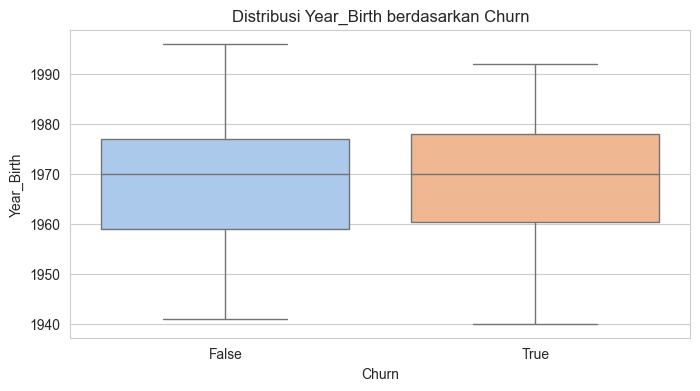

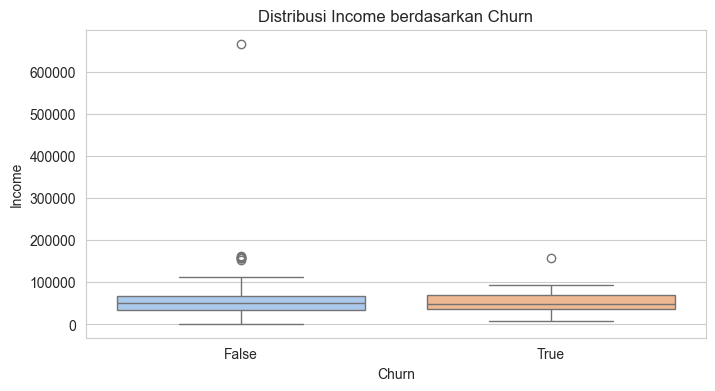

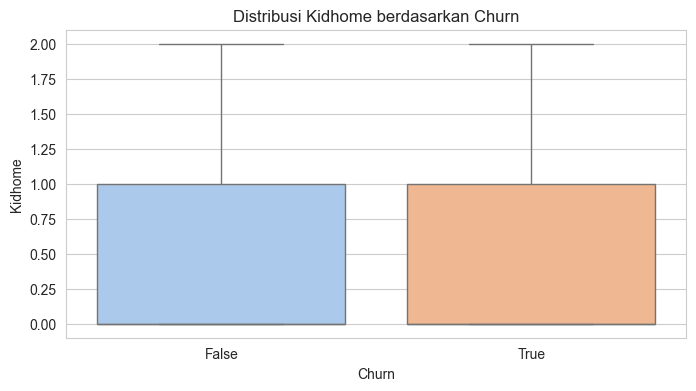

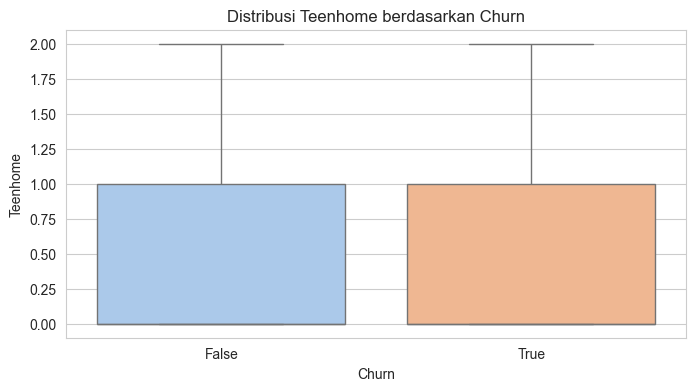

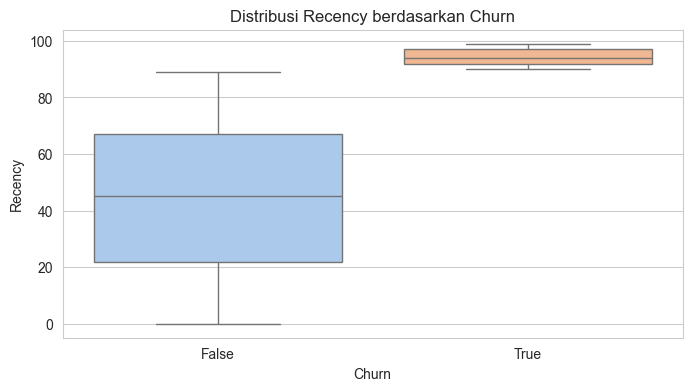

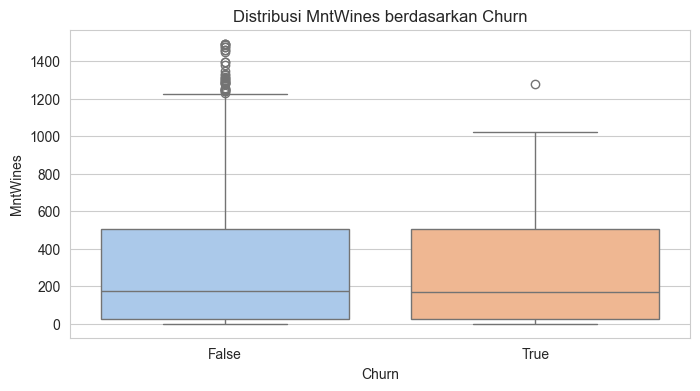

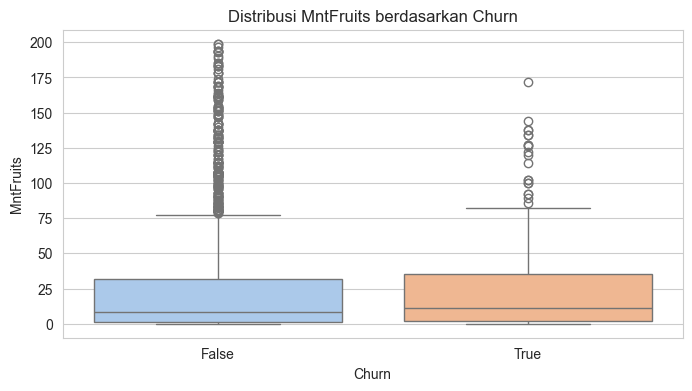

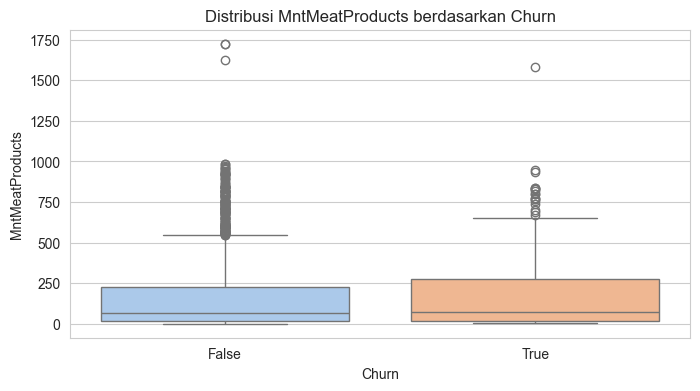

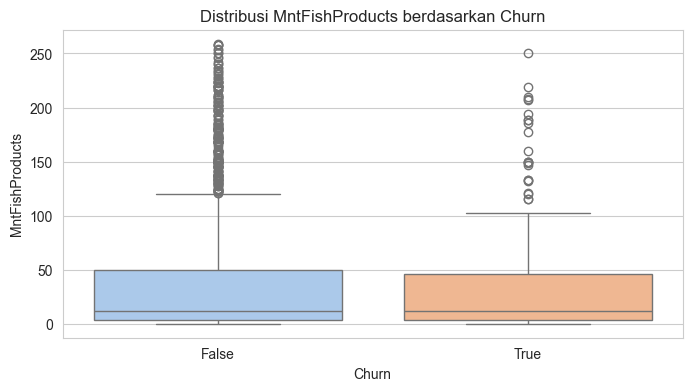

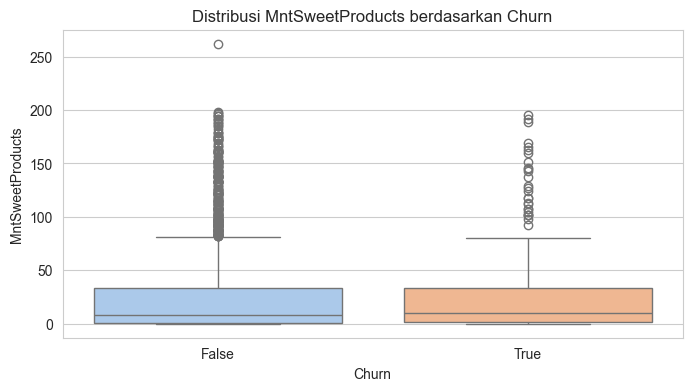

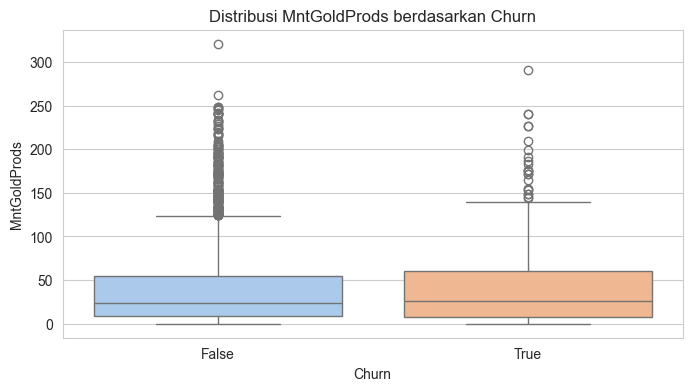

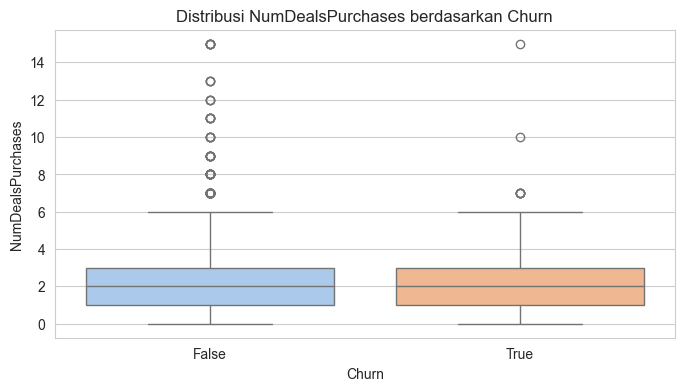

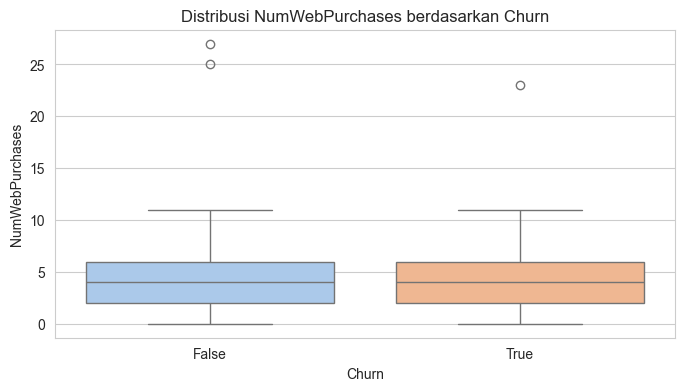

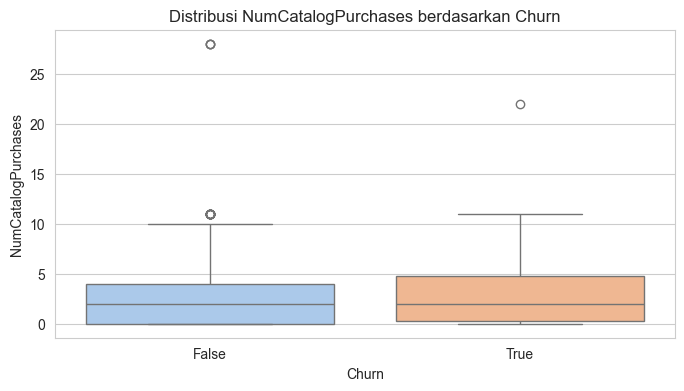

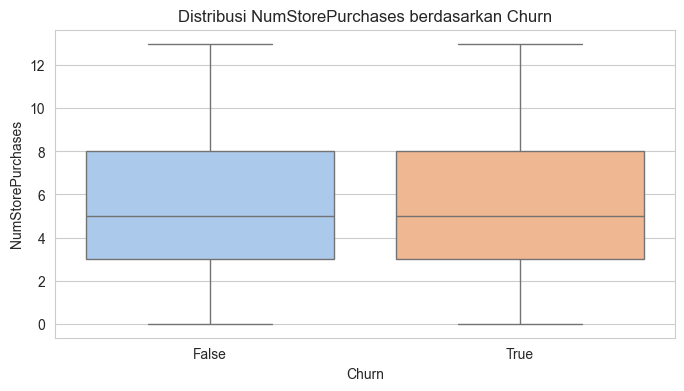

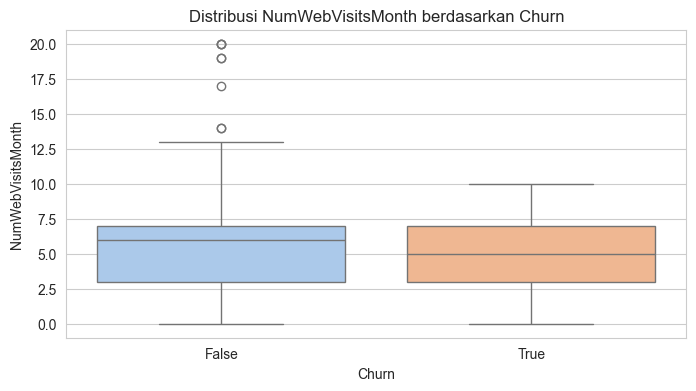

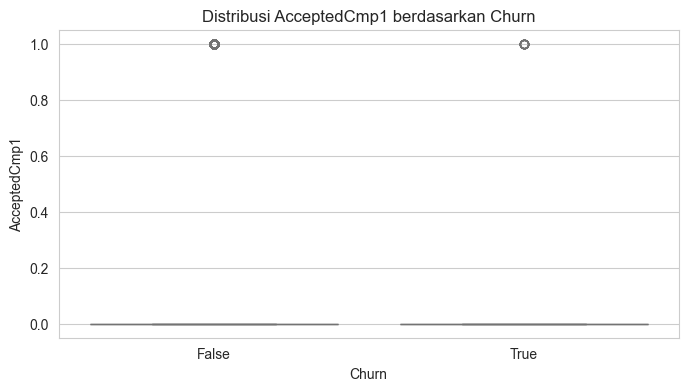

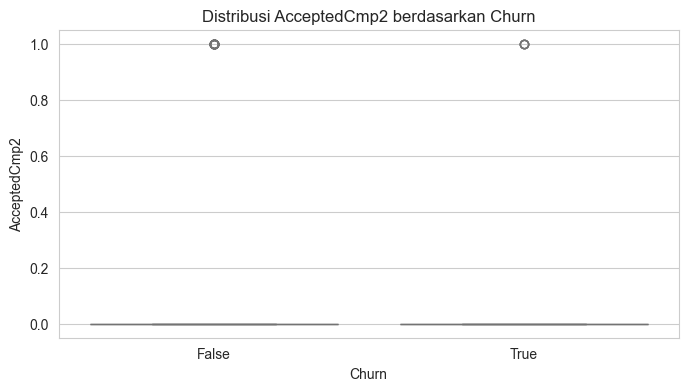

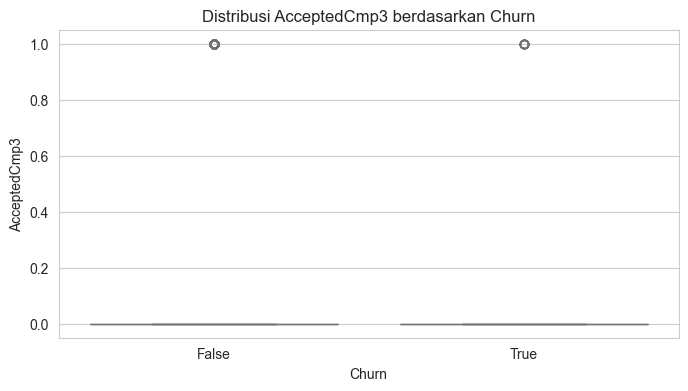

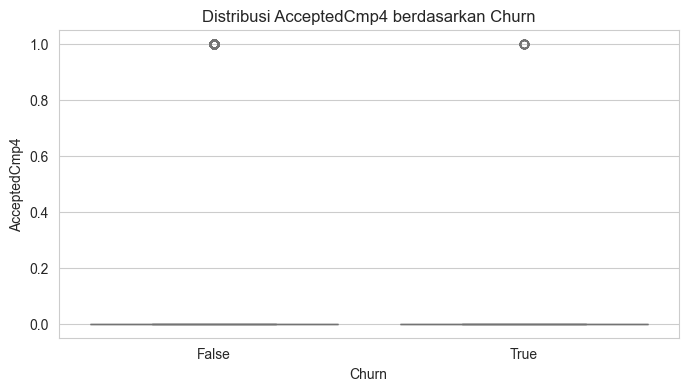

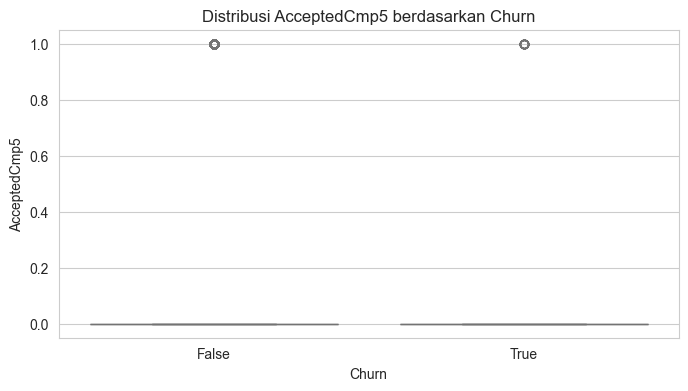

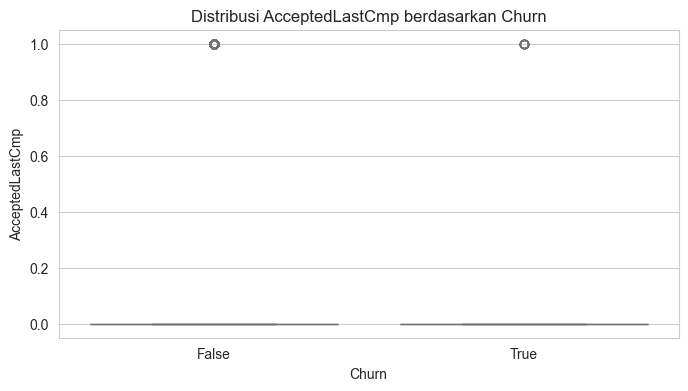

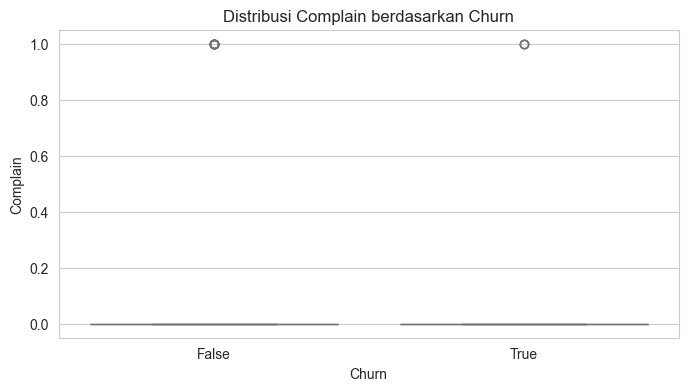

In [111]:
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    if col != "Churn":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="Churn", y=col, data=df, palette="pastel")
        plt.title(f"Distribusi {col} berdasarkan Churn")
        plt.show()

Ini adalah perbandingan dari kolom-kolom numerical antara Customer yang tidak churn dan yang akan berpotensi untuk churn. Dapat terlihat bahwa dari segi ukuran boxplot sangat mirip. Artinya, semua kolom numerical belum menjawab pertanyaan dari "Apa yang menyebabkan customer membership tersebut tidak berbelanja lebih dari atau sama dengan 90 hari.

### Kolom Kategorikal

In [112]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"{col}: p-value = {p:.5f}")

    if p < 0.05:
        print(f" -> {col} memiliki hubungan signifikan dengan Churn.\n")
    else:
        print(f" -> {col} tidak memiliki hubungan signifikan dengan Churn.\n")

ID: p-value = 0.49001
 -> ID tidak memiliki hubungan signifikan dengan Churn.

Generation: p-value = 0.97622
 -> Generation tidak memiliki hubungan signifikan dengan Churn.

Education: p-value = 0.74566
 -> Education tidak memiliki hubungan signifikan dengan Churn.

Marital_Status: p-value = 0.41674
 -> Marital_Status tidak memiliki hubungan signifikan dengan Churn.

Income_Category: p-value = 0.93630
 -> Income_Category tidak memiliki hubungan signifikan dengan Churn.

Have_Child: p-value = 0.82548
 -> Have_Child tidak memiliki hubungan signifikan dengan Churn.



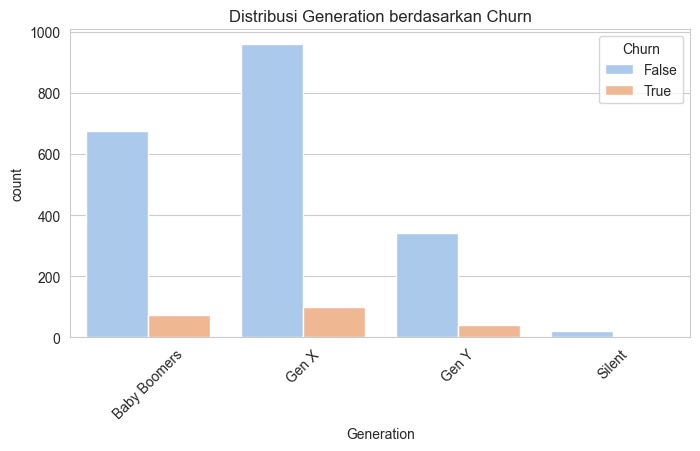

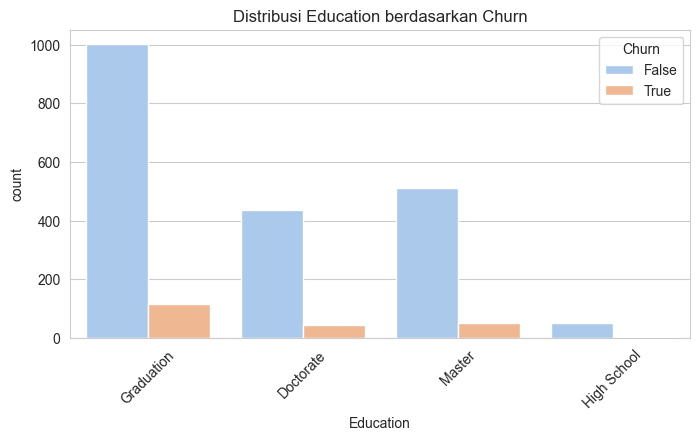

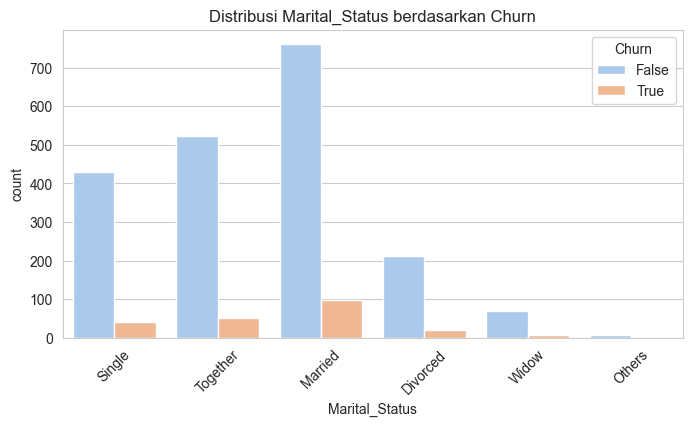

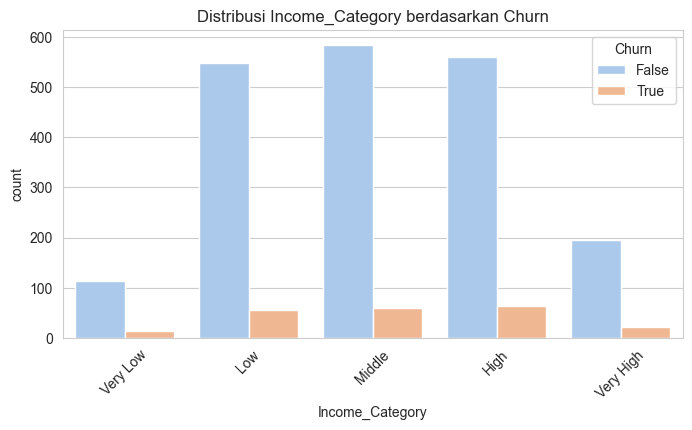

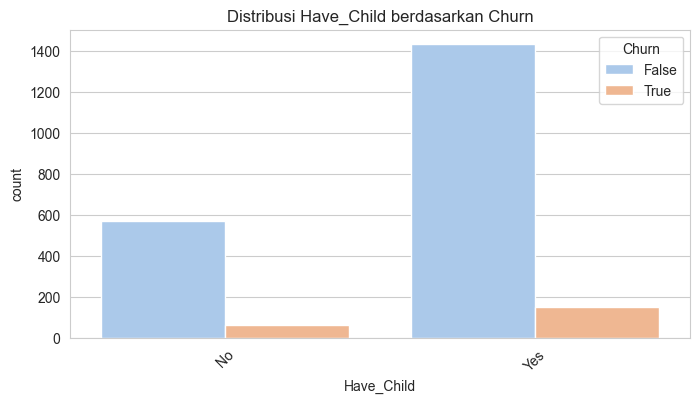

In [113]:
for col in categorical_cols:
    if col != 'ID':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue="Churn", data=df, palette="pastel")
        plt.title(f"Distribusi {col} berdasarkan Churn")
        plt.xticks(rotation=45)
        plt.show()

Dapat terlihat bahwa dari hasil uji statistik bahwa Kolom `AcceptedLastCmp` adalah kolom satu-satunya yang berhubungan dengan kolom `Churn` dibuktikan dengan hasil pengujian Chi_contingency memiliki pvalue < 0.05, lebih tepatnya 0.00011.

Untuk itu, mari kita gali lebih dalam.

### Menghitung Probabilitas Churn pada Setiap Kelompok

In [114]:
churn_rate = df.groupby("AcceptedLastCmp")[["Churn"]].mean().reset_index()
churn_rate['Churn'] = churn_rate['Churn'] * 100
churn_rate

AcceptedLastCmp      Churn
0                0  10.691489
1                1   3.903904

AcceptedLastCmp = 0 → Churn = 10.69%
→ Artinya, 10.69% dari pelanggan yang tidak menerima campaign terakhir mengalami churn.

AcceptedLastCmp = 1 → Churn = 3.90%
→ Artinya, 3.90% dari pelanggan yang menerima campaign terakhir mengalami churn.

Dari hasil churn rate terbukti bahwa customer yang tidak menerima kampanye pemasaran terakhir lebih tinggi daripada customer yang menerima kampanye pemasaran terakhir. Artinya kampanye dapat mengurangi resiko customer untuk churn.

Namun, meskipun churn lebih rendah pada grup AcceptedLastCmp = 1, tetap ada pelanggan yang churn. Artinya, campaign tidak sepenuhnya efektif untuk semua pelanggan.

In [115]:
df_churn['AcceptedLastCmp'].value_counts() / len(df_churn) * 100

AcceptedLastCmp
0    93.925234
1     6.074766
Name: count, dtype: float64

Dari proporsi customer yang berpotensi untuk churn, customer yang tidak menerima kampanye pemasaran terakhir memiliki proporsi yang lebih besar dibandingkan yang menerima kampanye.

In [116]:
df['AcceptedLastCmp'].value_counts() / len(df) * 100

AcceptedLastCmp
0    84.952553
1    15.047447
Name: count, dtype: float64

Jika dibandingkan dengan customer yang tidak churn. Proporsinya lebih besar yang tidak menerima kampanye terakhir dibandingkan yang menerima kampanye. Sama seperti dataframe yang berisikan customer yang berpotensi untuk churn, akan tetapi kalau dilihat dari proporsinya, customer yang tidak menerima kampanye terakhir lebih besar pada dataframe yang berisikan customer yang berpotensi untuk churn dibandingkan yang tidak churn. Dan dari hasil uji statistik pun menunjukkan bahwa kolom `AcceptedLastCmp` memiliki pvalue < 0.05, artinya berpengaruh terhadap Churn atau tidaknya.

Mari kita breakdown lebih detail lagi.

### Mengecek Distribusi Total Transaksi Berdasarkan Produk Tertentu Antara Churn dan Tidak Churn

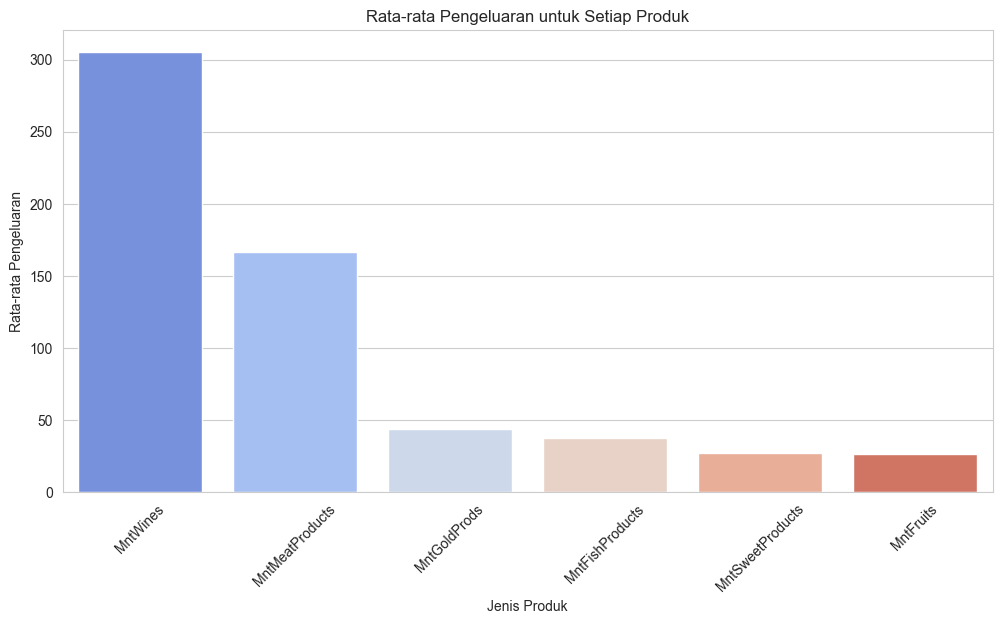

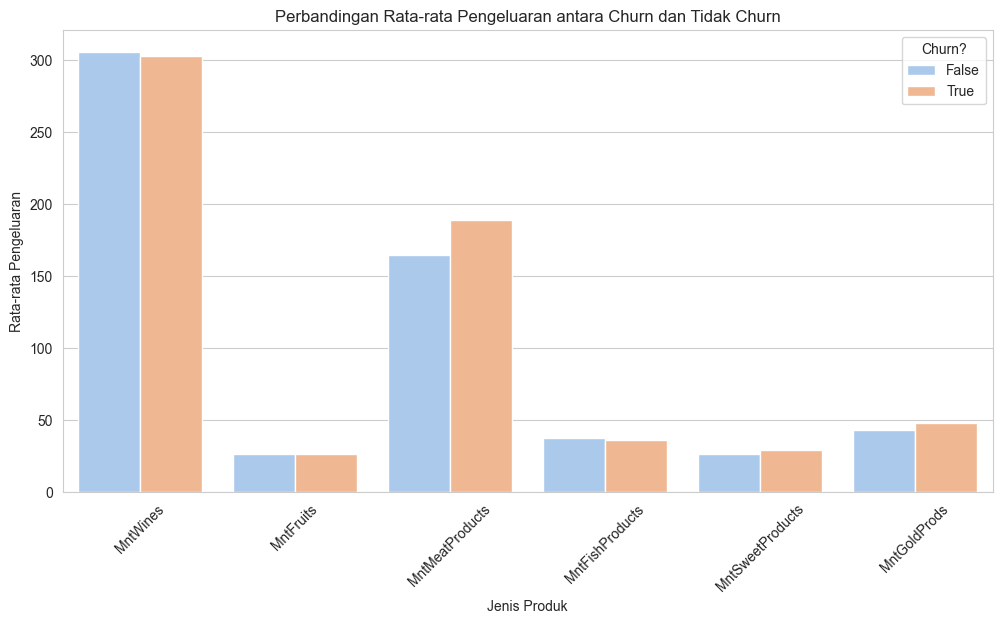

In [117]:
# Daftar kolom pengeluaran produk
spending_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

# Hitung rata-rata pengeluaran untuk setiap produk
avg_spending = df[spending_cols].mean().sort_values(ascending=False)

# Visualisasi 1: Rata-rata Pengeluaran Tiap Produk
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_spending.index, y=avg_spending.values, palette="coolwarm")
plt.title("Rata-rata Pengeluaran untuk Setiap Produk")
plt.xlabel("Jenis Produk")
plt.ylabel("Rata-rata Pengeluaran")
plt.xticks(rotation=45)
plt.show()

# Visualisasi 2: Perbandingan Rata-rata Pengeluaran antara Churn dan Tidak Churn
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Churn"], value_vars=spending_cols, var_name="Produk", value_name="Pengeluaran")
sns.barplot(data=df_melted, x="Produk", y="Pengeluaran", hue="Churn", palette="pastel", ci=None)
plt.title("Perbandingan Rata-rata Pengeluaran antara Churn dan Tidak Churn")
plt.xlabel("Jenis Produk")
plt.ylabel("Rata-rata Pengeluaran")
plt.legend(title="Churn?")
plt.xticks(rotation=45)
plt.show()

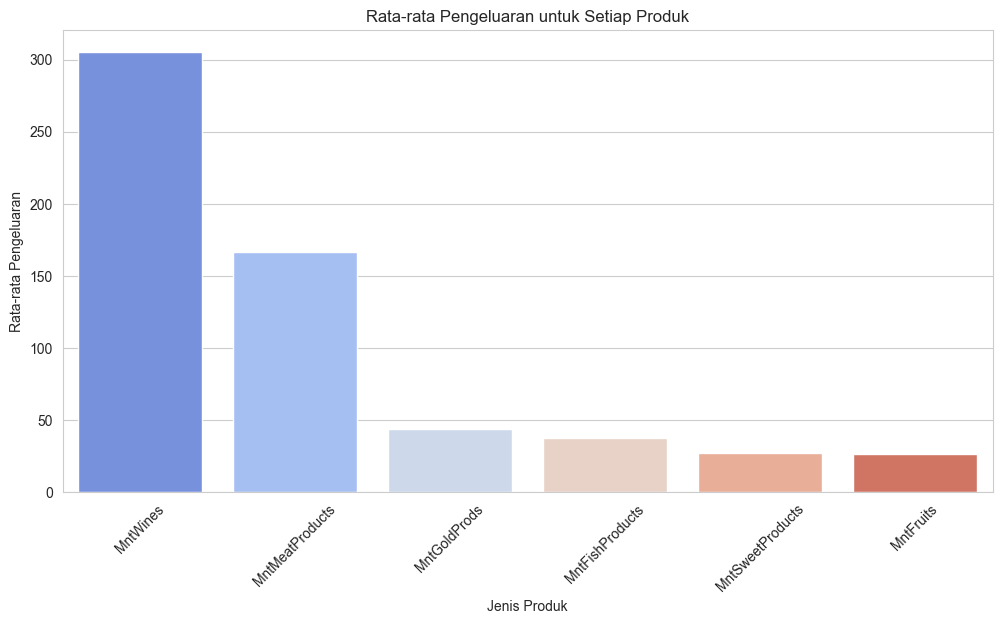

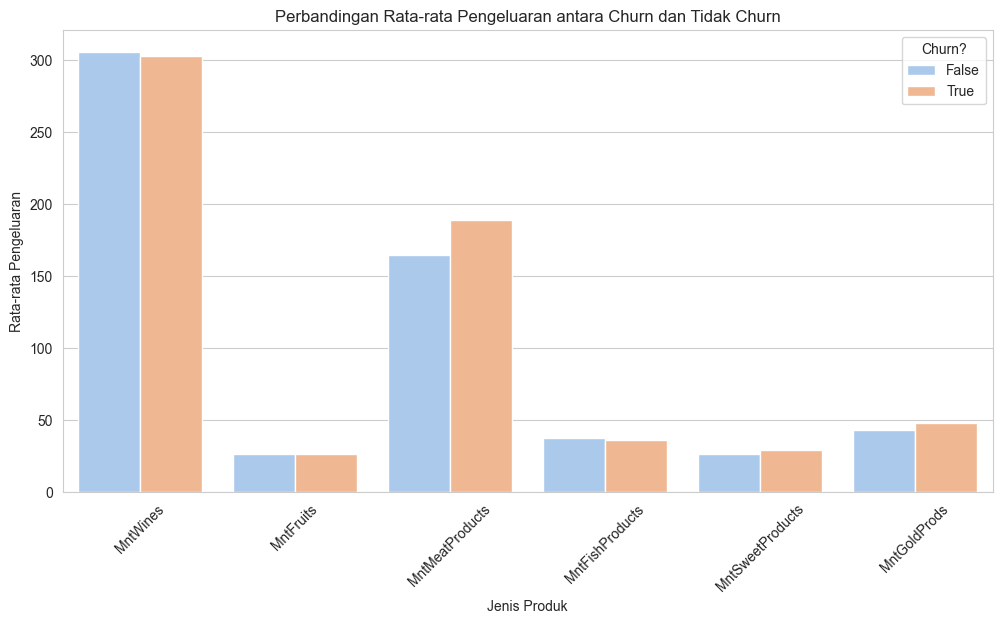

In [118]:
# Daftar kolom pengeluaran produk
spending_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

# Hitung rata-rata pengeluaran untuk setiap produk
avg_spending = df[spending_cols].mean().sort_values(ascending=False)

# Visualisasi 1: Rata-rata Pengeluaran Tiap Produk
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_spending.index, y=avg_spending.values, palette="coolwarm")
plt.title("Rata-rata Pengeluaran untuk Setiap Produk")
plt.xlabel("Jenis Produk")
plt.ylabel("Rata-rata Pengeluaran")
plt.xticks(rotation=45)
plt.show()

# Visualisasi 2: Perbandingan Rata-rata Pengeluaran antara Churn dan Tidak Churn
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Churn"], value_vars=spending_cols, var_name="Produk", value_name="Pengeluaran")
sns.barplot(data=df_melted, x="Produk", y="Pengeluaran", hue="Churn", palette="pastel", ci=None)
plt.title("Perbandingan Rata-rata Pengeluaran antara Churn dan Tidak Churn")
plt.xlabel("Jenis Produk")
plt.ylabel("Rata-rata Pengeluaran")
plt.legend(title="Churn?")
plt.xticks(rotation=45)
plt.show()

- Polanya hampir sama → Tidak ada perbedaan signifikan antara pengeluaran customer churn dan tidak churn.
    - Jika customer churn memiliki pengeluaran jauh lebih rendah, kita bisa berasumsi bahwa mereka sudah mulai mengurangi belanja sebelum akhirnya churn.
    - Namun, dalam grafik ini, perbedaannya kecil, yang berarti pengeluaran bukan satu-satunya penyebab utama churn.

- Tidak ada indikator kapan pengeluaran mulai menurun → Bisa jadi mereka tetap memiliki rata-rata pengeluaran yang sama, tetapi frekuensinya berkurang.
    - Jika kita memiliki data trend pembelian per bulan sebelum churn, kita bisa melihat apakah ada pola penurunan pengeluaran sebelum mereka berhenti belanja sama sekali.

In [119]:
df_churn_not_acc = df_churn[df_churn['AcceptedLastCmp'] == 0]
df_churn_acc = df_churn[df_churn['AcceptedLastCmp'] > 0]
df_churn_acc

ID  Year_Birth    Generation   Education Marital_Status   Income  \
104    999        1991         Gen Y  Graduation         Single  86037.0   
670   9826        1972         Gen X   Doctorate         Single  86857.0   
674   7230        1960  Baby Boomers   Doctorate       Divorced  50611.0   
868   5830        1972         Gen X   Doctorate         Single  86857.0   
940   5748        1965         Gen X  Graduation        Married  59754.0   
1236  5153        1967         Gen X   Doctorate        Married  77766.0   
1245  3979        1983         Gen Y   Doctorate       Divorced  90687.0   
1265  9516        1971         Gen X      Master       Divorced  49118.0   
1453  4070        1969         Gen X   Doctorate        Married  94871.0   
1649  4127        1967         Gen X   Doctorate        Married  77766.0   
1893  5831        1967         Gen X  Graduation        Married  77870.0   
2134  5667        1964  Baby Boomers   Doctorate        Married  60896.0   
2141  3520        1990         Gen Y      Master         Single  91172.0   

     Income_Category  Kidhome  Teenhome Have_Child Dt_Customer  Recency  \
104        Very High        0         0         No  2013-01-02       95   
670        Very High        0         0         No  2012-09-12       96   
674           Middle        0         1        Yes  2012-10-04       98   
868        Very High        0         0         No  2012-09-12       96   
940           Middle        0         1        Yes  2012-12-01       96   
1236            High        0         1        Yes  2013-02-22       97   
1245       Very High        0         0         No  2013-05-22       98   
1265          Middle        0         0         No  2012-08-18       90   
1453       Very High        0         2        Yes  2012-09-01       99   
1649            High        0         1        Yes  2013-02-22       97   
1893            High        0         1        Yes  2012-08-22       93   
2134            High        0         1        Yes  2012-10-11       90   
2141       Very High        0         0         No  2013-03-27       94   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
104        490         44              125               29                20   
670        899        102              838              133               102   
674        459          0               24                6                 0   
868        899        102              838              133               102   
940        115         27               44                4               146   
1236      1004         59              265              115                59   
1245       982         17              672               23                34   
1265       620         54              239               99                98   
1453       169         24              553              188                 0   
1649      1004         59              265              115                59   
1893      1017         50              500               65                50   
2134      1013         30              399               60                46   
2141       162         28              818                0                28   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
104             22                  1                6                    7   
670             40                  1                5                    6   
674              4                  6                4                    5   
868             40                  1                5                    6   
940            139                  3                5                    2   
1236            27                  2               11                   10   
1245            51                  1                6                    2   
1265           119                  2                9                    7   
1453           144                  1         

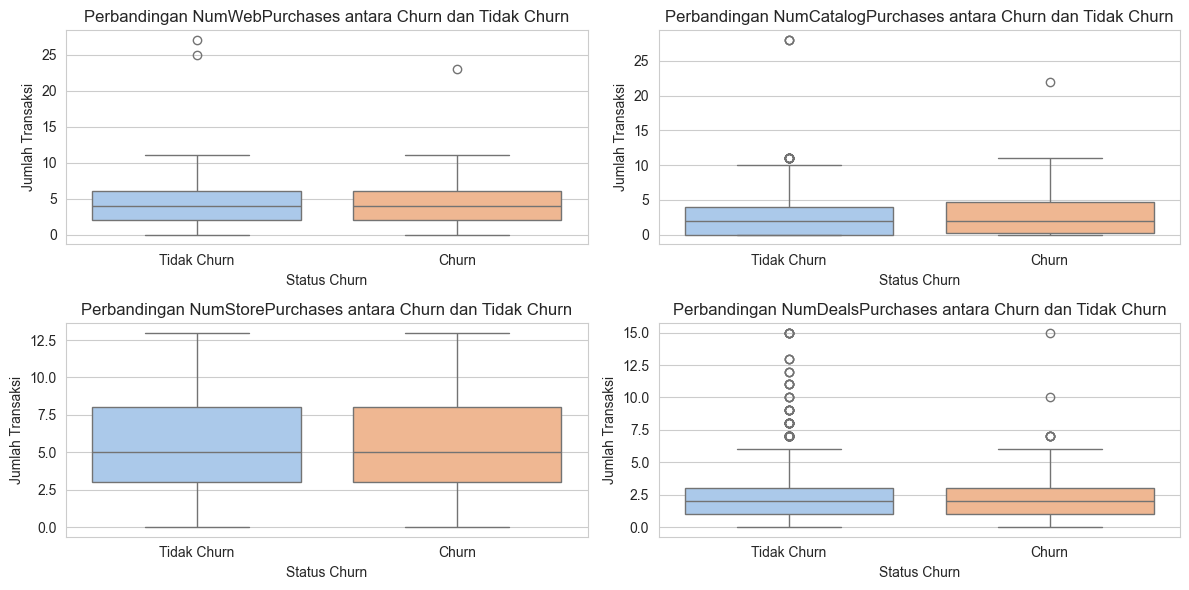

In [120]:
# List kolom transaksi
transaction_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

plt.figure(figsize=(12, 6))
for i, col in enumerate(transaction_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'Perbandingan {col} antara Churn dan Tidak Churn')
    plt.xlabel('Status Churn')
    plt.ylabel('Jumlah Transaksi')
    plt.xticks([0, 1], ['Tidak Churn', 'Churn'])

plt.tight_layout()
plt.show()

In [121]:
for col in transaction_columns:
    churn_data = df[df['Churn'] == 1][col]
    non_churn_data = df[df['Churn'] == 0][col]
    
    stat, p = mannwhitneyu(churn_data, non_churn_data, alternative='two-sided')
    print(f"{col}: Statistik = {stat}, p-value = {p}")

NumWebPurchases: Statistik = 214995.5, p-value = 0.9004859280324639
NumCatalogPurchases: Statistik = 218683.5, p-value = 0.583692986439698
NumStorePurchases: Statistik = 215919.0, p-value = 0.8181440386963812
NumDealsPurchases: Statistik = 214841.5, p-value = 0.9106908976096658


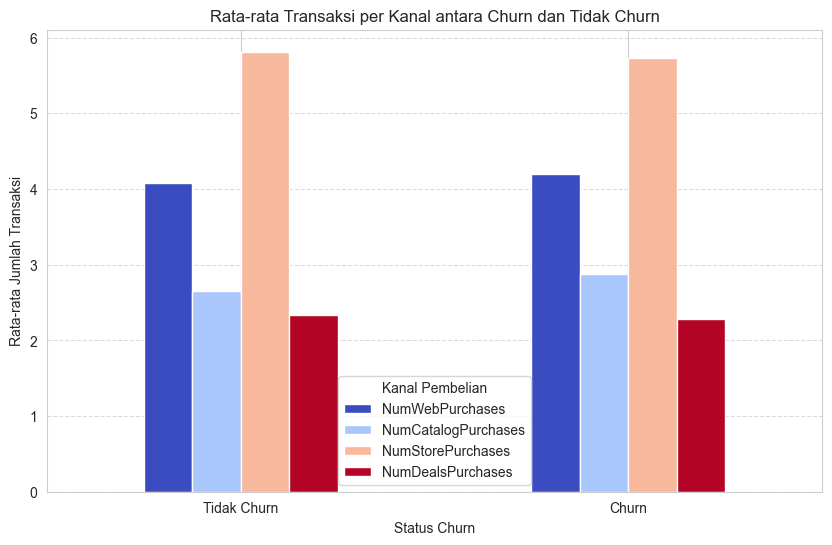

In [122]:
df_grouped = df.groupby("Churn")[transaction_columns].mean()

df_grouped.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Rata-rata Transaksi per Kanal antara Churn dan Tidak Churn")
plt.xlabel("Status Churn")
plt.ylabel("Rata-rata Jumlah Transaksi")
plt.xticks(ticks=[0, 1], labels=['Tidak Churn', 'Churn'], rotation=0)
plt.legend(title="Kanal Pembelian")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

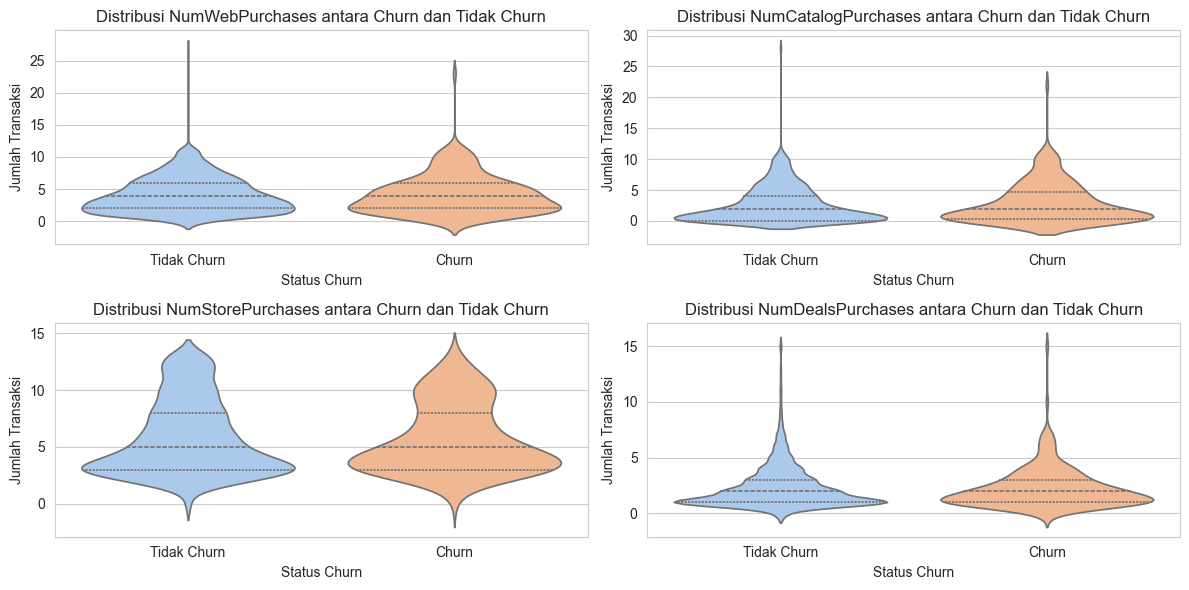

In [123]:
# List kolom transaksi
transaction_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Membuat visualisasi
plt.figure(figsize=(12, 6))
for i, col in enumerate(transaction_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Churn', y=col, data=df, palette='pastel', inner='quartile')
    plt.title(f'Distribusi {col} antara Churn dan Tidak Churn')
    plt.xlabel('Status Churn')
    plt.ylabel('Jumlah Transaksi')
    plt.xticks([0, 1], ['Tidak Churn', 'Churn'])

plt.tight_layout()
plt.show()

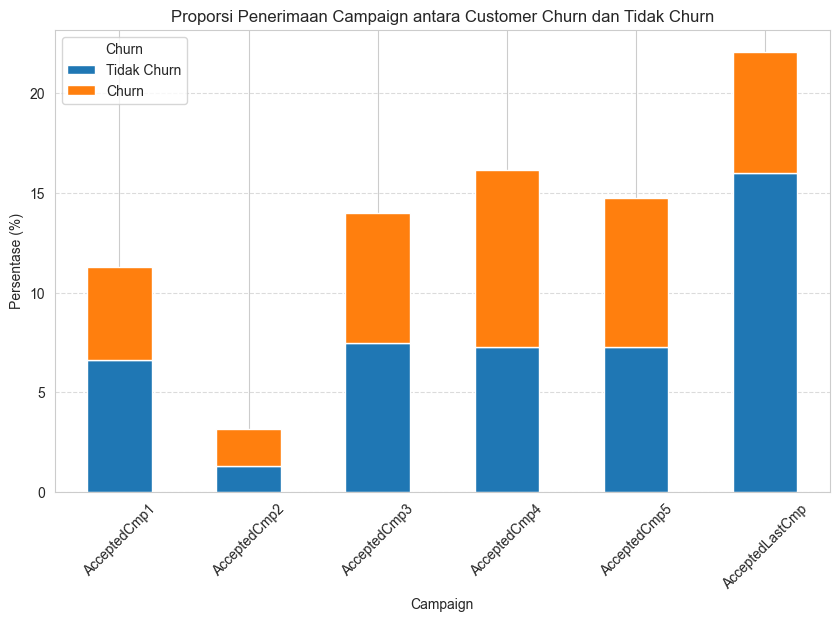

In [124]:
# List kolom campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedLastCmp']

# Menghitung proporsi penerimaan campaign berdasarkan status churn
df_campaign = df.groupby("Churn")[campaign_cols].mean().T * 100  # Ubah ke persen

# Plot
df_campaign.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Proporsi Penerimaan Campaign antara Customer Churn dan Tidak Churn")
plt.xlabel("Campaign")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["Tidak Churn", "Churn"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

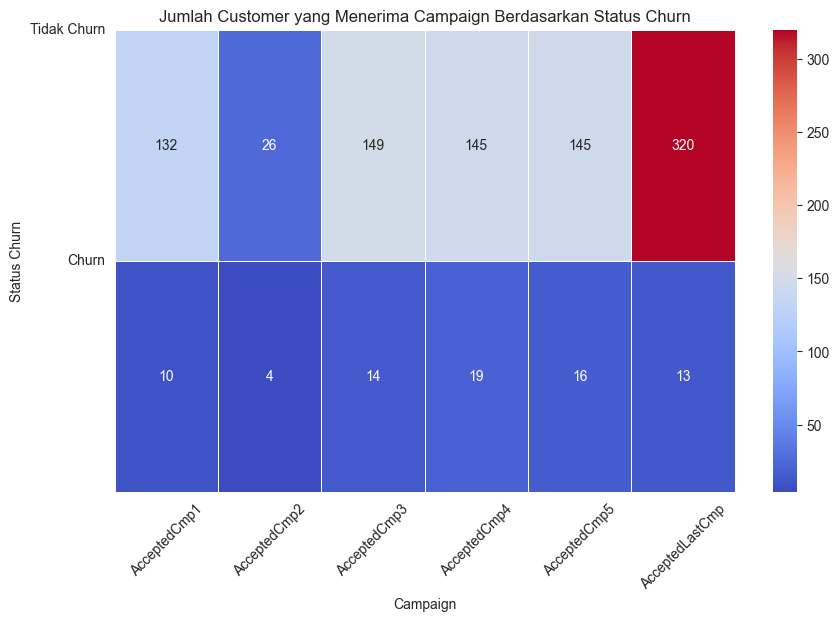

In [125]:
# Hitung jumlah customer berdasarkan churn dan campaign acceptance
df_heatmap = df.groupby("Churn")[campaign_cols].sum()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_heatmap, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

plt.title("Jumlah Customer yang Menerima Campaign Berdasarkan Status Churn")
plt.xlabel("Campaign")
plt.ylabel("Status Churn")
plt.xticks(rotation=45)
plt.yticks([0,1], ["Tidak Churn", "Churn"], rotation=0)
plt.show()

Oke, jadi sudah terlihat polanya bahwa alasan mengapa customer membership tersebut churn ada hubungannya dengan AcceptedLastCmp. Dibuktikan juga dengan hasil stackedplot dan heatmap bahwa jika keduanya dibandingkan dengan proporsi customer yang tidak churn, customer membership yang tidak churn dan menerima kampanye pemasaran terakhir jauh lebih besar dibandingkan dengan customer membership yang churn dan menerima kampanye pemasaran terakhir.

Artinya, customer yang sudah tidak berbelanja selama lebih dari atau sama dengan 90 hari (berpotensi churn) disebabkan oleh

Bagaimana cara paling terbaik untuk melihat perbedaan signifikan dari semua kolom antara customer yang: 
- Tidak Churn, menerima, dan tidak menerima AcceptedLastCmp
- Churn, menerima, dan tidak menerima AcceptedLastCmp

Mari kita bedah lebih detail lagi.

In [126]:
from scipy.stats import f_oneway

# Hitung Frequency (Jumlah Transaksi)
df['Frequency'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Filter data berdasarkan kategori
group1 = df[(df['Churn'] == 1) & (df['AcceptedLastCmp'] == 1)]['Frequency']
group2 = df[(df['Churn'] == 1) & (df['AcceptedLastCmp'] == 0)]['Frequency']
group3 = df[(df['Churn'] == 0) & (df['AcceptedLastCmp'] == 1)]['Frequency']
group4 = df[(df['Churn'] == 0) & (df['AcceptedLastCmp'] == 0)]['Frequency']

# Uji ANOVA
f_stat, p_value = f_oneway(group1, group2, group3, group4)

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Terdapat perbedaan signifikan antara kelompok")
else:
    print("Tidak ada perbedaan signifikan antara kelompok")

ANOVA F-statistic: 19.987280346812703, p-value: 8.816726948384982e-13
Terdapat perbedaan signifikan antara kelompok


In [127]:
# Hitung Frequency (Jumlah Transaksi)
df_churn['Frequency'] = df_churn[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

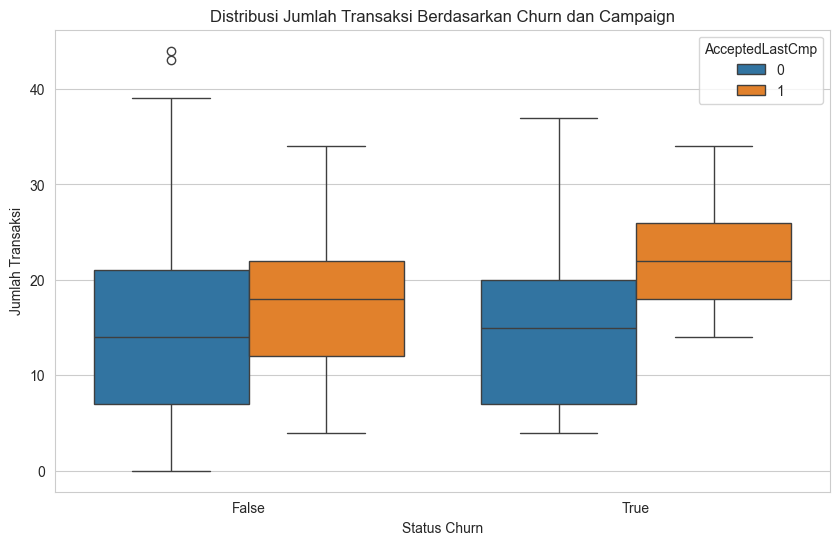

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Frequency', hue='AcceptedLastCmp', data=df)
plt.title('Distribusi Jumlah Transaksi Berdasarkan Churn dan Campaign')
plt.xlabel('Status Churn')
plt.ylabel('Jumlah Transaksi')
plt.legend(title="AcceptedLastCmp")
plt.show()

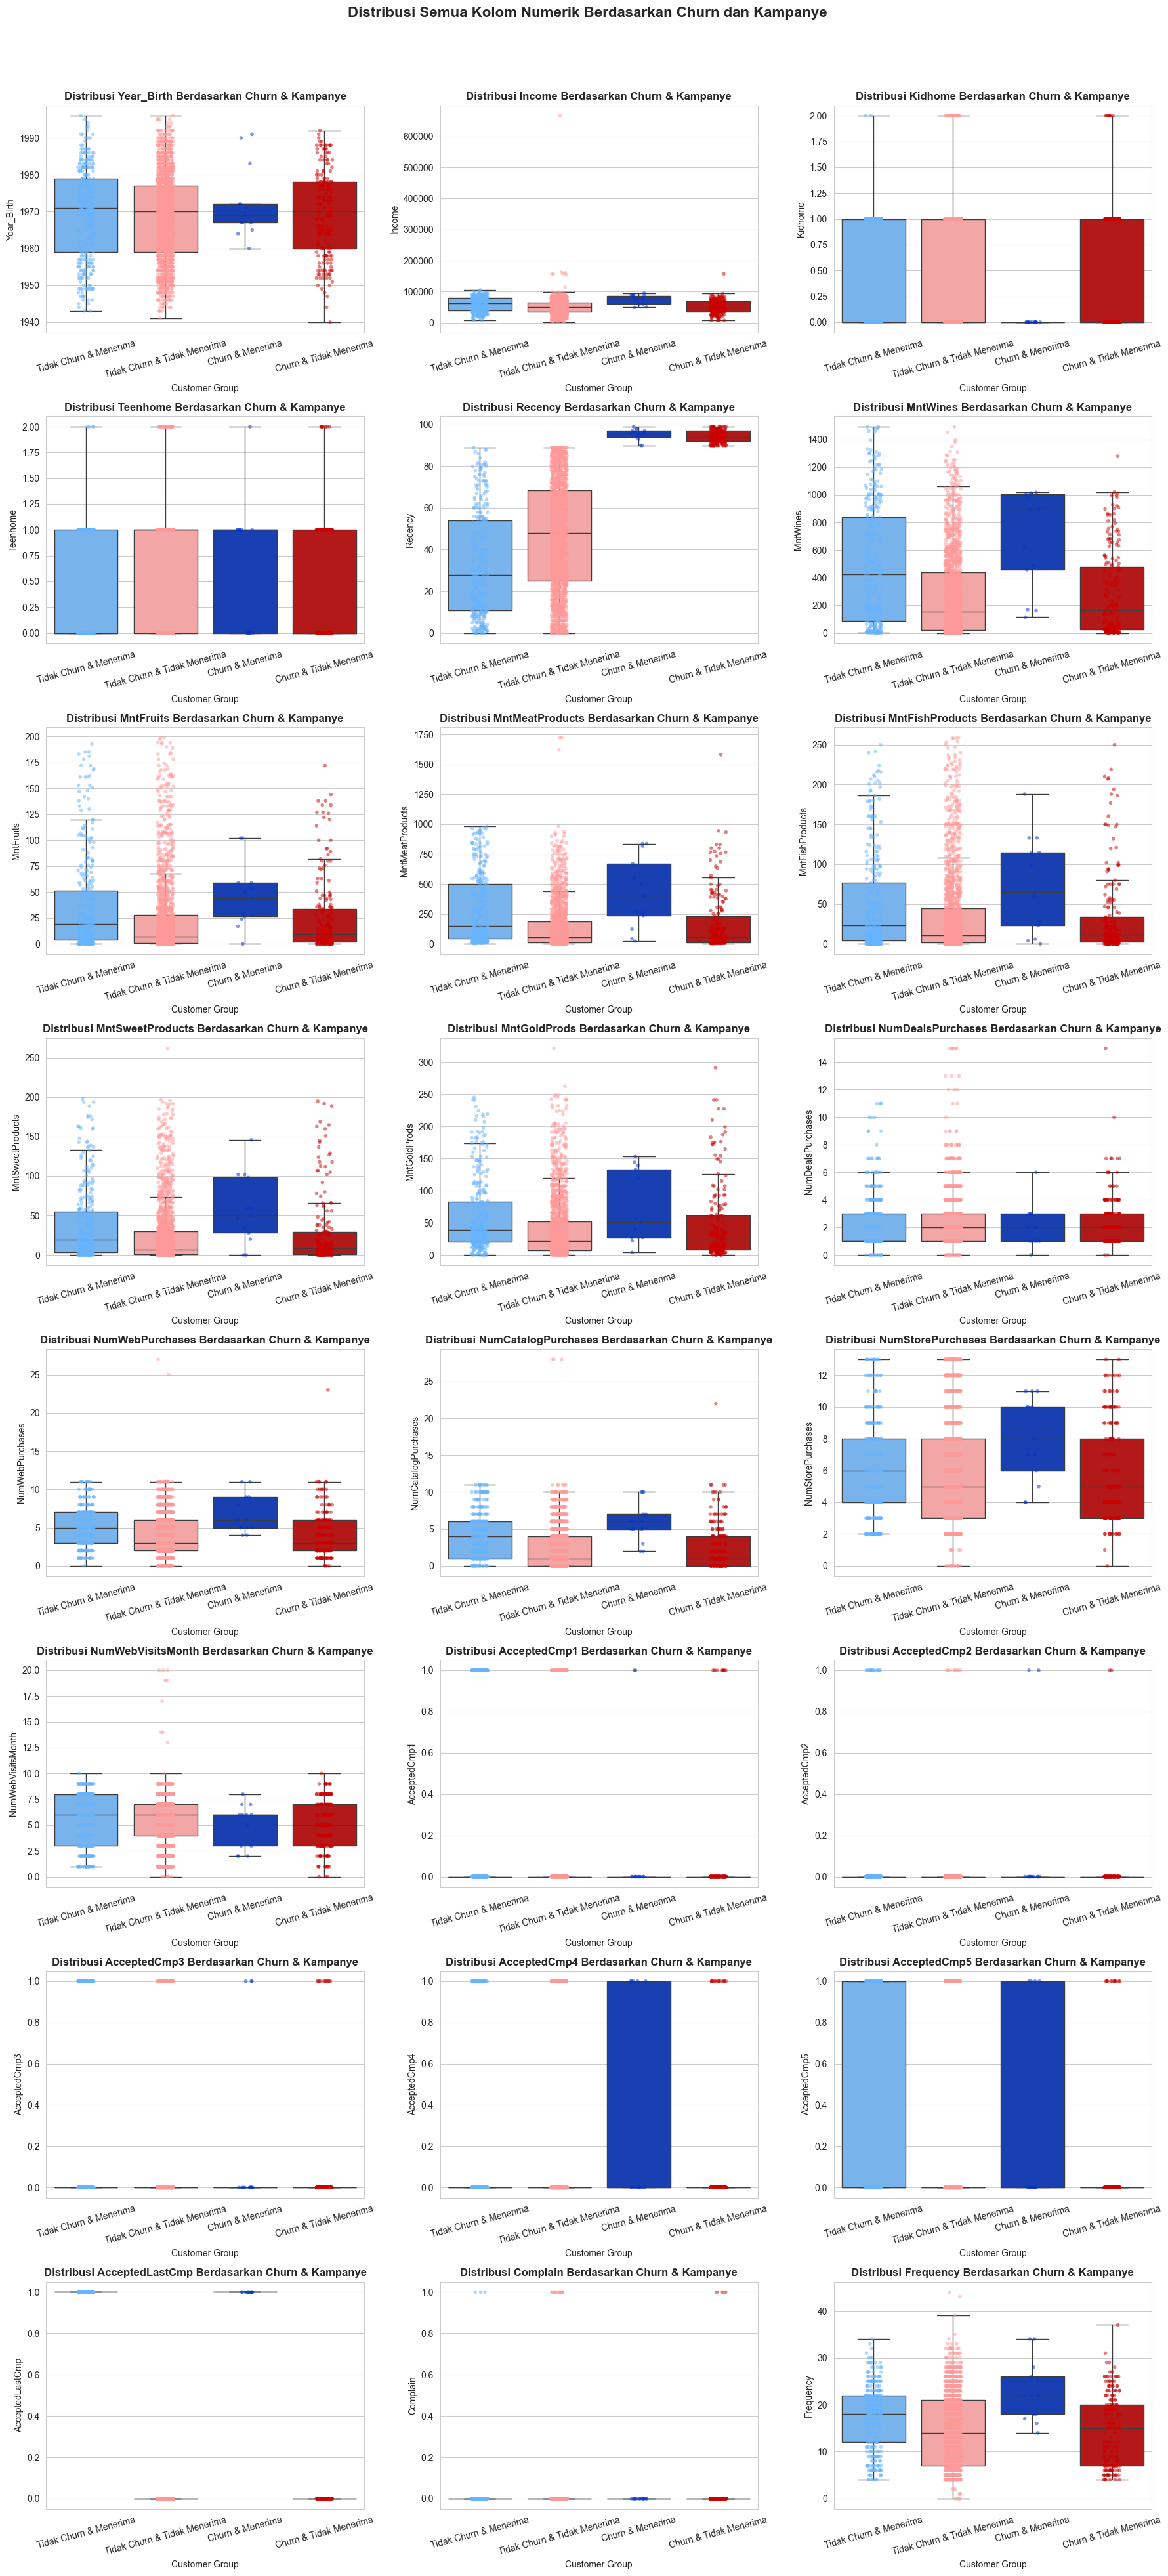

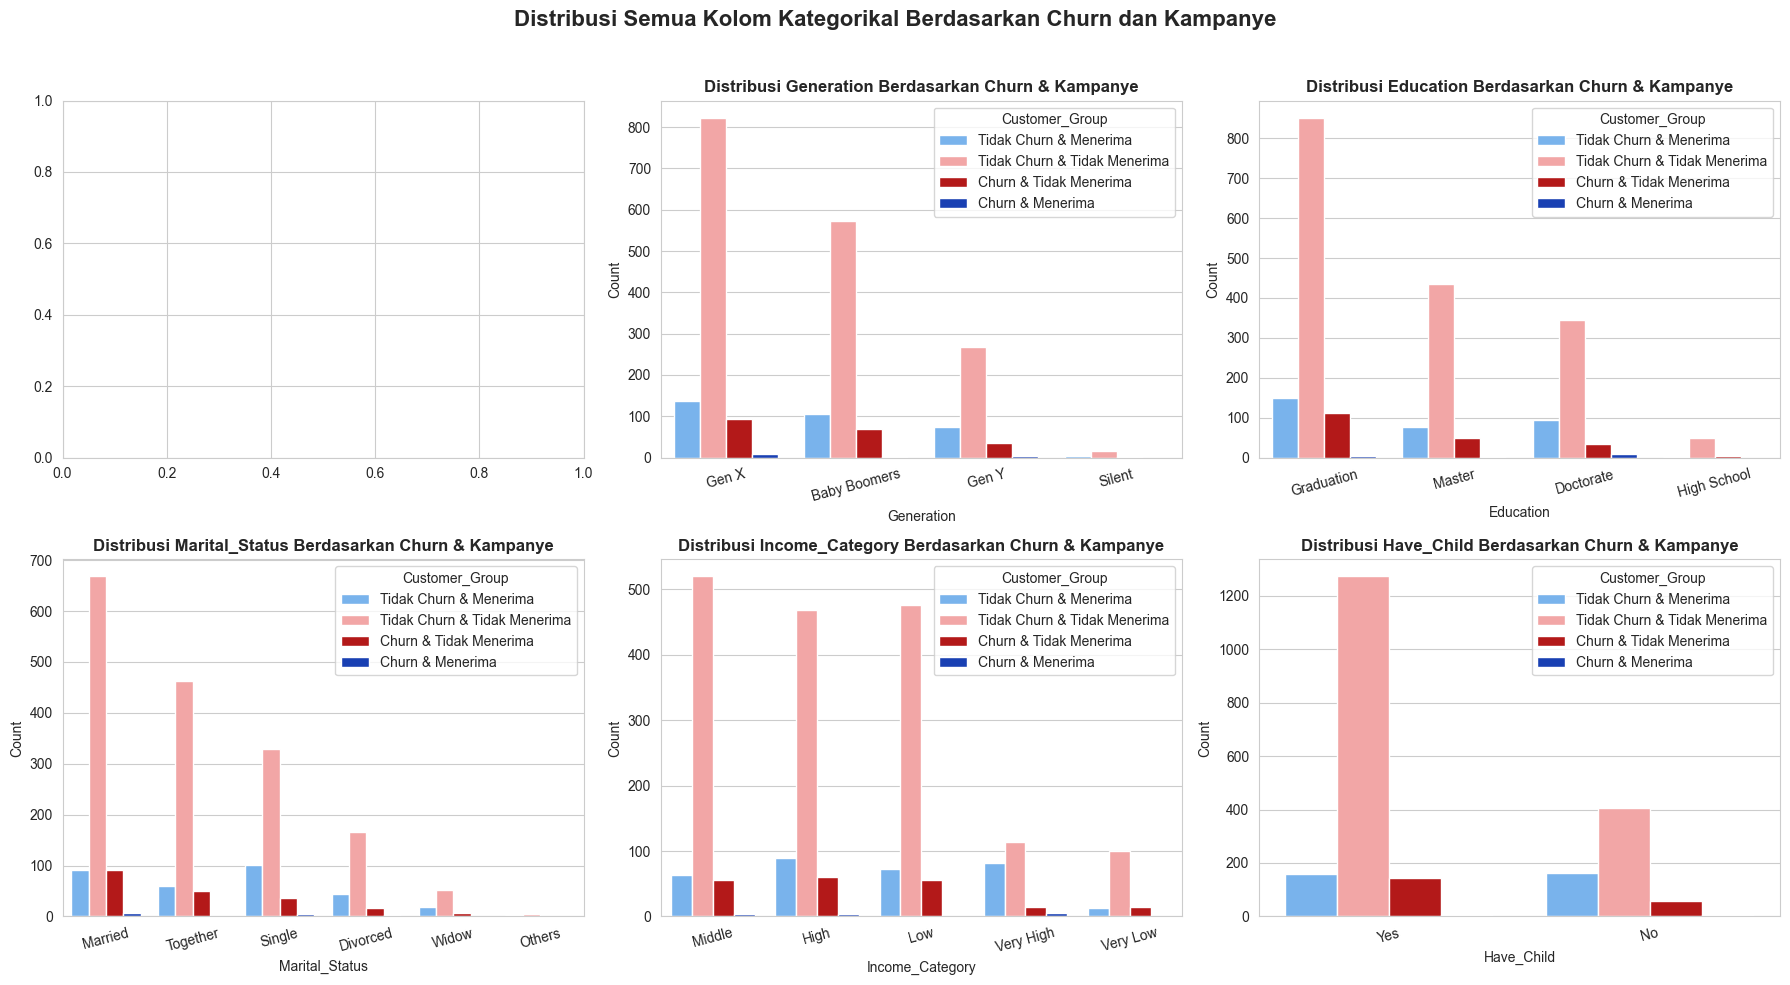

In [129]:
# Set style seaborn
sns.set_style("whitegrid")

# Menentukan semua kolom numerik dan kategorikal yang akan divisualisasikan
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Membuat kolom kategori untuk grouping berdasarkan churn dan kampanye
df['Customer_Group'] = df.apply(lambda x: 
    "Tidak Churn & Menerima" if (x['Churn'] == 0 and x['AcceptedLastCmp'] == 1) else
    "Tidak Churn & Tidak Menerima" if (x['Churn'] == 0 and x['AcceptedLastCmp'] == 0) else
    "Churn & Menerima" if (x['Churn'] == 1 and x['AcceptedLastCmp'] == 1) else
    "Churn & Tidak Menerima", axis=1)

# Urutan kategori untuk legend
order_category = ["Tidak Churn & Menerima", "Tidak Churn & Tidak Menerima", 
                  "Churn & Menerima", "Churn & Tidak Menerima"]

# Warna spesifik untuk setiap kategori
color_palette = {
    "Tidak Churn & Menerima": "#66B3FF",
    "Tidak Churn & Tidak Menerima": "#FF9999",
    "Churn & Menerima": "#0033CC",
    "Churn & Tidak Menerima": "#CC0000"
}

### **🔹 Visualisasi Kolom Numerik dengan Boxplot + Scatterplot**
cols_per_row = 3  
rows = -(-len(numerical_columns) // cols_per_row)  # Hitung jumlah baris yang dibutuhkan

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    
    # Boxplot per kolom numerik
    sns.boxplot(x='Customer_Group', y=column, data=df, order=order_category, palette=color_palette, ax=ax, showfliers=False)
    
    # Scatterplot (Jitter) untuk distribusi titik data
    sns.stripplot(x='Customer_Group', y=column, data=df, order=order_category, jitter=True, alpha=0.5,
                  marker="o", size=4, ax=ax, palette=color_palette)
    
    ax.set_title(f'Distribusi {column} Berdasarkan Churn & Kampanye', fontsize=12, fontweight='bold')
    ax.set_xlabel('Customer Group')
    ax.set_ylabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

# Hapus subplot kosong jika jumlah kolom tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribusi Semua Kolom Numerik Berdasarkan Churn dan Kampanye", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **🔸 Visualisasi Kolom Kategorikal dengan Countplot**
if len(categorical_columns) > 0:
    cols_per_row = 3  
    rows = -(-len(categorical_columns) // cols_per_row)  

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        if column != 'ID':
            ax = axes[i]

            # Countplot untuk distribusi kolom kategorikal berdasarkan Customer_Group
            sns.countplot(x=column, hue='Customer_Group', data=df, order=df[column].value_counts().index, palette=color_palette, ax=ax)
            
            ax.set_title(f'Distribusi {column} Berdasarkan Churn & Kampanye', fontsize=12, fontweight='bold')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

    # Hapus subplot kosong jika jumlah kolom tidak kelipatan 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Distribusi Semua Kolom Kategorikal Berdasarkan Churn dan Kampanye", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

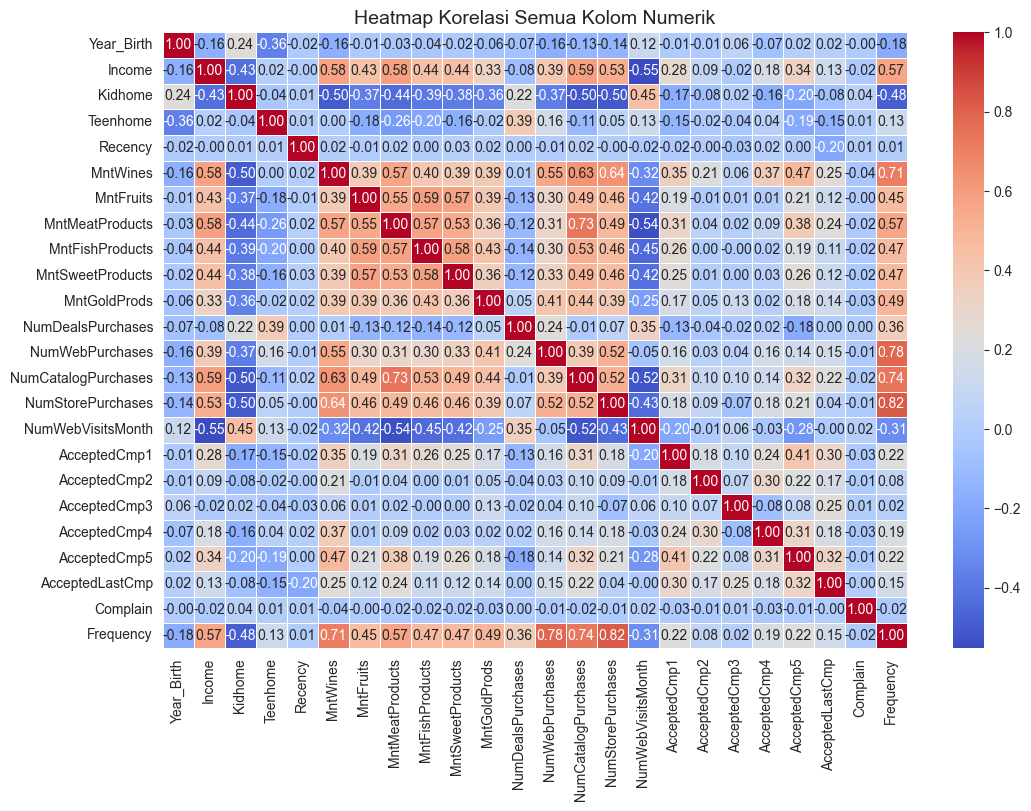

In [131]:
# Memilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung korelasi antar kolom numerik
corr_matrix = df_numeric.corr()

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Semua Kolom Numerik", fontsize=14)

# Tampilkan plot
plt.show()

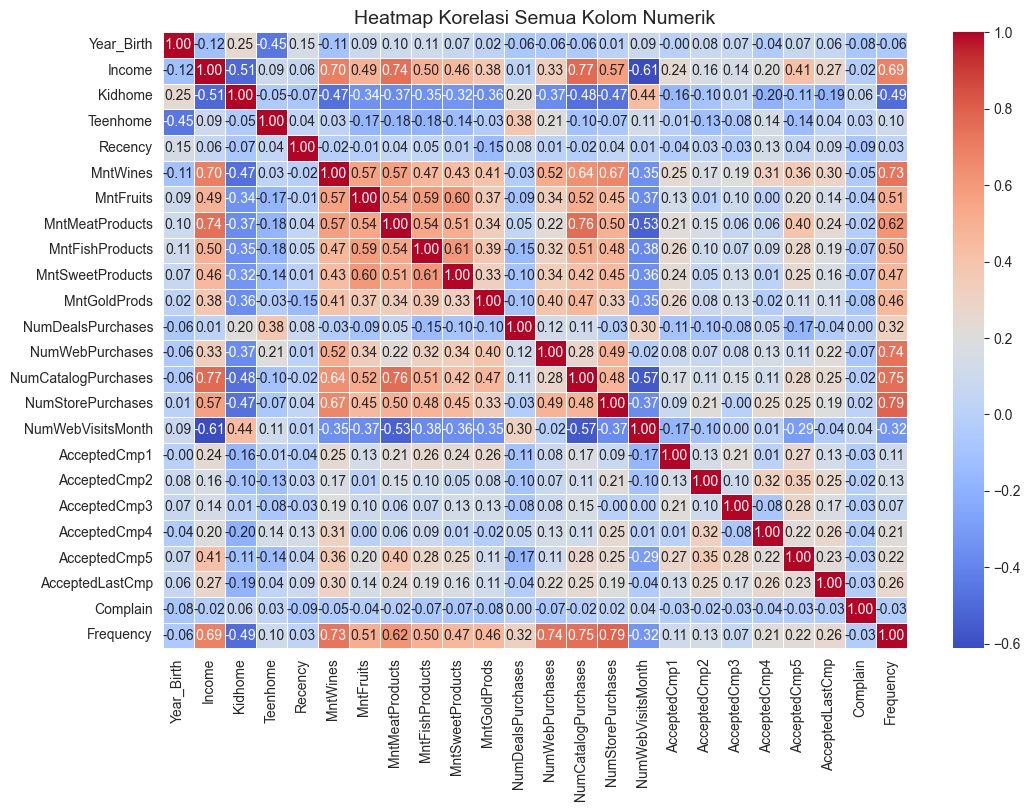

In [132]:
# Memilih hanya kolom numerik
df_numeric_churn = df_churn.select_dtypes(include=['number'])

# Hitung korelasi antar kolom numerik
corr_matrix = df_numeric_churn.corr()

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Judul grafik
plt.title("Heatmap Korelasi Semua Kolom Numerik", fontsize=14)

# Tampilkan plot
plt.show()

ID  Year_Birth    Generation   Education Marital_Status   Income  \
104    999        1991         Gen Y  Graduation         Single  86037.0   
670   9826        1972         Gen X   Doctorate         Single  86857.0   
674   7230        1960  Baby Boomers   Doctorate       Divorced  50611.0   
868   5830        1972         Gen X   Doctorate         Single  86857.0   
940   5748        1965         Gen X  Graduation        Married  59754.0   
1236  5153        1967         Gen X   Doctorate        Married  77766.0   
1245  3979        1983         Gen Y   Doctorate       Divorced  90687.0   
1265  9516        1971         Gen X      Master       Divorced  49118.0   
1453  4070        1969         Gen X   Doctorate        Married  94871.0   
1649  4127        1967         Gen X   Doctorate        Married  77766.0   
1893  5831        1967         Gen X  Graduation        Married  77870.0   
2134  5667        1964  Baby Boomers   Doctorate        Married  60896.0   
2141  3520        1990         Gen Y      Master         Single  91172.0   

     Income_Category  Kidhome  Teenhome Have_Child Dt_Customer  Recency  \
104        Very High        0         0         No  2013-01-02       95   
670        Very High        0         0         No  2012-09-12       96   
674           Middle        0         1        Yes  2012-10-04       98   
868        Very High        0         0         No  2012-09-12       96   
940           Middle        0         1        Yes  2012-12-01       96   
1236            High        0         1        Yes  2013-02-22       97   
1245       Very High        0         0         No  2013-05-22       98   
1265          Middle        0         0         No  2012-08-18       90   
1453       Very High        0         2        Yes  2012-09-01       99   
1649            High        0         1        Yes  2013-02-22       97   
1893            High        0         1        Yes  2012-08-22       93   
2134            High        0         1        Yes  2012-10-11       90   
2141       Very High        0         0         No  2013-03-27       94   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
104        490         44              125               29                20   
670        899        102              838              133               102   
674        459          0               24                6                 0   
868        899        102              838              133               102   
940        115         27               44                4               146   
1236      1004         59              265              115                59   
1245       982         17              672               23                34   
1265       620         54              239               99                98   
1453       169         24              553              188                 0   
1649      1004         59              265              115                59   
1893      1017         50              500               65                50   
2134      1013         30              399               60                46   
2141       162         28              818                0                28   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
104             22                  1                6                    7   
670             40                  1                5                    6   
674              4                  6                4                    5   
868             40                  1                5                    6   
940            139                  3                5                    2   
1236            27                  2               11                   10   
1245            51                  1                6                    2   
1265           119                  2                9                    7   
1453           144                  1         

Dari hasil analisis, bisa diambil kesimpulan bahwa: 
- Customer yang Churn & Menerima kampanye pemasaran terakhir semuanya tidak punya anak kecil (umur 6 - 12 tahun).
- Customer yang Churn & Menerima kampanye pemasaran terakhir memiliki rata-rata jumlah transaksi dan total pengeluaran lebih tinggi dibandingkan kategori lainnya.

Karena dari distribusi data numerical dan proporsi kolom kategorikal perbedaannya hanya 2 kolom, mari kita bedah lebih detail lagi.

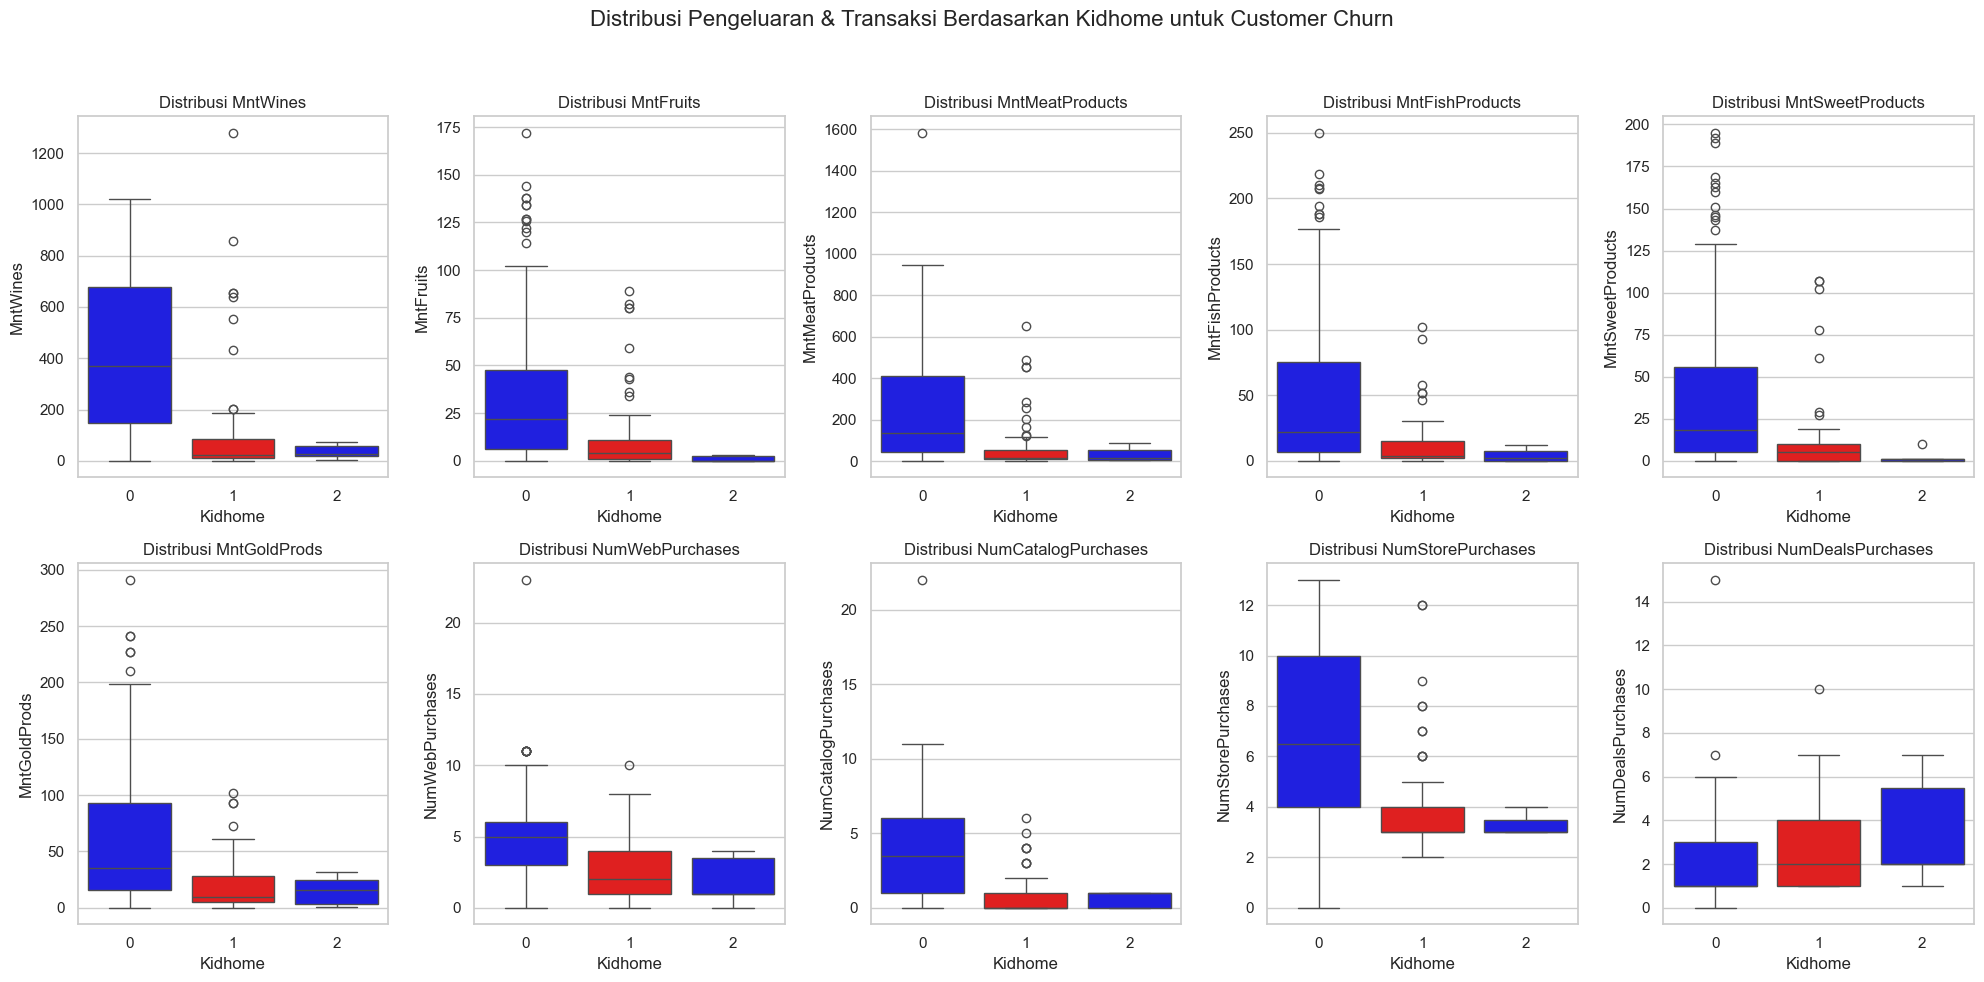

In [143]:
# Membagi data berdasarkan Kidhome
df_kidhome_0 = df_churn[df_churn['Kidhome'] == 0]
df_kidhome_1 = df_churn[df_churn['Kidhome'] > 0]

# Kolom pengeluaran dan transaksi yang akan divisualisasikan
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Menampilkan boxplot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle("Distribusi Pengeluaran & Transaksi Berdasarkan Kidhome untuk Customer Churn", fontsize=16)

for i, col in enumerate(columns_to_plot):
    row, col_idx = divmod(i, 5)
    sns.boxplot(data=df_churn, x='Kidhome', y=col, ax=axes[row, col_idx], palette=["blue", "red"])
    axes[row, col_idx].set_title(f'Distribusi {col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Disini dapat terlihat bahwa semakin banyak anak (6-12 tahun), maka semakin sedikit juga total pengeluaran dan jumlah transaksinya. Kecuali pada pembelian diskon (NumDealsPurchases). Dapat terlihat bahwa customer membership yang memiliki banyak anak (6-12 tahun), maka jumlah transaksinya semakin banyak

In [141]:
df_churn[(df_churn['AcceptedLastCmp'] == 1) & (df_churn['Kidhome'] == 0)]

ID  Year_Birth    Generation   Education Marital_Status   Income  \
104    999        1991         Gen Y  Graduation         Single  86037.0   
670   9826        1972         Gen X   Doctorate         Single  86857.0   
674   7230        1960  Baby Boomers   Doctorate       Divorced  50611.0   
868   5830        1972         Gen X   Doctorate         Single  86857.0   
940   5748        1965         Gen X  Graduation        Married  59754.0   
1236  5153        1967         Gen X   Doctorate        Married  77766.0   
1245  3979        1983         Gen Y   Doctorate       Divorced  90687.0   
1265  9516        1971         Gen X      Master       Divorced  49118.0   
1453  4070        1969         Gen X   Doctorate        Married  94871.0   
1649  4127        1967         Gen X   Doctorate        Married  77766.0   
1893  5831        1967         Gen X  Graduation        Married  77870.0   
2134  5667        1964  Baby Boomers   Doctorate        Married  60896.0   
2141  3520        1990         Gen Y      Master         Single  91172.0   

     Income_Category  Kidhome  Teenhome Have_Child Dt_Customer  Recency  \
104        Very High        0         0         No  2013-01-02       95   
670        Very High        0         0         No  2012-09-12       96   
674           Middle        0         1        Yes  2012-10-04       98   
868        Very High        0         0         No  2012-09-12       96   
940           Middle        0         1        Yes  2012-12-01       96   
1236            High        0         1        Yes  2013-02-22       97   
1245       Very High        0         0         No  2013-05-22       98   
1265          Middle        0         0         No  2012-08-18       90   
1453       Very High        0         2        Yes  2012-09-01       99   
1649            High        0         1        Yes  2013-02-22       97   
1893            High        0         1        Yes  2012-08-22       93   
2134            High        0         1        Yes  2012-10-11       90   
2141       Very High        0         0         No  2013-03-27       94   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
104        490         44              125               29                20   
670        899        102              838              133               102   
674        459          0               24                6                 0   
868        899        102              838              133               102   
940        115         27               44                4               146   
1236      1004         59              265              115                59   
1245       982         17              672               23                34   
1265       620         54              239               99                98   
1453       169         24              553              188                 0   
1649      1004         59              265              115                59   
1893      1017         50              500               65                50   
2134      1013         30              399               60                46   
2141       162         28              818                0                28   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
104             22                  1                6                    7   
670             40                  1                5                    6   
674              4                  6                4                    5   
868             40                  1                5                    6   
940            139                  3                5                    2   
1236            27                  2               11                   10   
1245            51                  1                6                    2   
1265           119                  2                9                    7   
1453           144                  1         

Kalau gitu, Saya akan gunakan RFM Score

Mengapa Fokus pada RFM_Score Rendah untuk Analisis Churn?
- Mereka sudah menunjukkan tanda-tanda churn
    - Recency tinggi → Sudah lama tidak belanja
    - Frequency rendah → Jarang melakukan transaksi
    - Monetary rendah → Pengeluaran sedikit
    - Ini adalah pelanggan yang sudah hampir meninggalkan supermarket.

- Mencari penyebab mengapa mereka tidak kembali
    - Dengan memahami karakteristik mereka, Anda bisa menemukan pola yang membuat mereka berhenti berbelanja.
    - Apakah karena faktor harga, promosi yang kurang menarik, atau persaingan dari supermarket lain?

- Mencegah kehilangan lebih banyak pelanggan potensial
    - Jika supermarket memahami mengapa pelanggan churn, strategi bisa dibuat untuk mencegah pelanggan lain mengikuti pola yang sama.

In [135]:
# # Buat DataFrame RFM dari df_churn
# df_rfm = df_churn[['ID', 'Recency']].copy()

# # Frequency (total transaksi dari berbagai channel)
# df_rfm['Frequency'] = df_churn[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# # Monetary (total pengeluaran pelanggan)
# df_rfm['Monetary'] = df_churn[['MntWines', 'MntFruits', 'MntMeatProducts', 
#                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# # Normalisasi nilai Recency (Semakin rendah Recency, semakin bagus skornya)
# df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'], q=4, labels=[4, 3, 2, 1])

# # Normalisasi nilai Frequency dan Monetary (Semakin tinggi Frequency & Monetary, semakin bagus)
# df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'], q=4, labels=[1, 2, 3, 4])
# df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'], q=4, labels=[1, 2, 3, 4])

# # Gabungkan skor RFM
# df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

# # Tampilkan hasil
# df_rfm.sort_values(by='RFM_Score', ascending=False)

# **4. Conclusion and Recommendation**

## **4.1 Conclusion**
- Setelah di uji statistik dengan menggunakan Mann–Whitney U test untuk kolom numerical, dan Chi Contingency untuk kolom categorical, dapat disimpulkan bahwa satu-satunya kolom yang memiliki hubungan signifikan kepada kolom `Churn` adalah kolom `AcceptedLastCmp`
- Churn_rate untuk customer yang tidak menerima kampanye terakhir: AcceptedLastCmp = 0 → Churn = 10.69%
→ Artinya, 10.69% dari pelanggan yang tidak menerima campaign terakhir mengalami churn.
- Churn_rate untuk customer yang menerima kampanye terakhir: AcceptedLastCmp = 1 → Churn = 3.90%
→ Artinya, 3.90% dari pelanggan yang menerima campaign terakhir mengalami churn.
- Dari hasil churn rate terbukti bahwa customer yang tidak menerima kampanye pemasaran terakhir lebih tinggi daripada customer yang menerima kampanye pemasaran terakhir. Artinya kampanye dapat mengurangi resiko customer untuk churn.
- Customer churn dan tidak menerima kampanye terakhir (AcceptedLastCmp = 0) memiliki proporsi yang lebih besar (93%) dibandingkan dengan customer yang tidak churn dan tidak menerima kampanye terakhir.
- Customer yang Churn & Menerima kampanye pemasaran terakhir semuanya tidak punya anak kecil (umur 6 - 12 tahun).
- Customer yang Churn & Menerima kampanye pemasaran terakhir memiliki rata-rata jumlah transaksi dan total pengeluaran lebih tinggi dibandingkan kategori lainnya.
- Semakin banyak anak (6-12 tahun), maka semakin sedikit juga total pengeluaran dan jumlah transaksinya. Kecuali pada pembelian diskon (NumDealsPurchases). Dapat terlihat bahwa customer membership yang memiliki banyak anak (6-12 tahun), maka jumlah transaksinya semakin banyak

## **4.2 Recommendation**

### Optimasi Kampanye Pemasaran untuk Mengurangi Churn
- Meningkatkan cakupan kampanye pemasaran → Pastikan lebih banyak pelanggan menerima kampanye terakhir agar tingkat churn lebih rendah.
    - Jika kampanye sebelumnya hanya dikirim ke pelanggan dengan riwayat pembelian tinggi, perluas ke pelanggan yang menunjukkan tanda-tanda berkurangnya frekuensi pembelian dalam 3 bulan terakhir.
    - Gunakan strategi omnichannel (email, SMS, media sosial) untuk meningkatkan engagement kampanye. Jika sebelumnya hanya mengandalkan email, tambahkan pengingat melalui SMS atau notifikasi aplikasi.
- Segmentasi pelanggan untuk personalisasi kampanye → Gunakan data pembelian dan demografi untuk menyesuaikan konten kampanye.
    - Jika pelanggan lebih sering membeli produk daging (MntMeatProducts), tawarkan diskon atau paket khusus terkait produk daging.
    - Jika pelanggan cenderung membeli melalui katalog (NumCatalogPurchases), berikan katalog khusus dengan promosi eksklusif untuk mendorong transaksi berikutnya.

### Fokus pada Pelanggan dengan Riwayat Pembelian Tinggi
- Program loyalitas eksklusif untuk pelanggan bernilai tinggi → Buat insentif khusus bagi pelanggan yang sering berbelanja untuk memastikan mereka tetap loyal.
    - Berikan level VIP berdasarkan total pengeluaran dalam setahun dengan benefit tambahan seperti cashback atau diskon eksklusif.
- Personalisasi insentif berdasarkan riwayat pembelian → Jangan hanya mengandalkan kampanye umum, tetapi gunakan pendekatan berbasis data.
    - Jika pelanggan memiliki riwayat pembelian dengan jumlah besar setiap akhir bulan, berikan pengingat promosi menjelang akhir bulan untuk mendorong repeat purchase.
    - Jika pelanggan sering membeli produk premium seperti wine (MntWines), berikan kupon diskon spesifik untuk produk tersebut.

### Menargetkan Pelanggan dengan Anak (6-12 Tahun) secara Spesifik
- Kampanye promosi yang menarik untuk keluarga dengan anak → Sesuaikan promosi dengan kebutuhan pelanggan yang memiliki anak kecil.
    - Berikan diskon khusus untuk produk makanan anak-anak seperti susu, sereal, dan camilan sehat.
- Meningkatkan promosi diskon yang lebih menarik bagi keluarga → Mengingat mereka lebih banyak bertransaksi saat ada diskon.
    - Buat program “Diskon Keluarga” di mana pelanggan bisa mendapatkan diskon tambahan jika membeli produk dalam jumlah tertentu.

### Meningkatkan Transaksi di Kanal yang Sering Digunakan oleh Pelanggan Churn
Pelanggan yang memiliki anak cenderung melakukan lebih banyak transaksi melalui promo diskon (NumDealsPurchases), sementara pelanggan churn dengan pengeluaran tinggi cenderung memiliki riwayat pembelian yang kuat di kanal seperti katalog (NumCatalogPurchases) dan web (NumWebPurchases).
- Memperkuat program promo untuk kanal transaksi tertentu → Sesuaikan penawaran dengan preferensi kanal yang digunakan pelanggan.
    - Jika pelanggan sering membeli melalui website, tawarkan promo "Flash Sale" khusus bagi pelanggan yang telah lama tidak bertransaksi untuk menarik mereka kembali.
    - Jika pelanggan lebih sering membeli melalui katalog, buat penawaran eksklusif khusus untuk pelanggan katalog dengan produk pilihan dan harga spesial.
- Gunakan strategi retargeting untuk pelanggan yang pernah aktif di kanal tertentu → Kirimkan pengingat atau rekomendasi produk berbasis histori transaksi.
    - Jika pelanggan pernah membeli dari katalog tetapi tidak lagi melakukan transaksi dalam 3 bulan terakhir, kirimkan katalog fisik atau digital dengan produk yang direkomendasikan.
    - Gunakan iklan digital yang menargetkan pelanggan yang sebelumnya sering berbelanja di website tetapi belum melakukan transaksi dalam beberapa bulan terakhir.